<a href="https://colab.research.google.com/github/PSURI1894/EDA_22BDS0116/blob/main/22BDS0116.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Phase 1

**1**. Dataset Loading and Initial Exploration


- Import libraries

- Load dataset from given URL

- Display first few rows (head)

In [37]:
import pandas as pd

# Load dataset from URL
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/SuicideChina.csv"
df = pd.read_csv(url)

# Preview data
df.head()


rownames  Person_ID Hospitalised Died Urban  Year  Month     Sex  Age  \
0         1          1          yes   no    no  2010     12  female   39   
1         2          2           no  yes    no  2009      3    male   83   
2         3          3           no  yes    no  2010      2    male   60   
3         4          4           no  yes    no  2011      1    male   73   
4         5          5          yes   no    no  2009      8    male   51   

   Education Occupation        method  
0  Secondary  household  Other poison  
1    primary    farming       Hanging  
2    primary    farming       Hanging  
3    primary    farming       Hanging  
4  Secondary    farming     Pesticide

**2.** Data Summary and Metadata

- Data types of each column

- Summary statistics (numerical + categorical)

In [38]:
# Dataset shape
print("Dataset Shape:", df.shape)

# Columns
print("\nColumn Names:\n", df.columns.tolist())

# Data Types
print("\nData Types:\n", df.dtypes)

Dataset Shape: (2571, 12)

Column Names:
 ['rownames', 'Person_ID', 'Hospitalised', 'Died', 'Urban', 'Year', 'Month', 'Sex', 'Age', 'Education', 'Occupation', 'method']

Data Types:
 rownames         int64
Person_ID        int64
Hospitalised    object
Died            object
Urban           object
Year             int64
Month            int64
Sex             object
Age              int64
Education       object
Occupation      object
method          object
dtype: object


In [39]:
# Numeric summary
df.describe()

# Categorical summary
df.describe(include='object')


Hospitalised  Died Urban     Sex  Education Occupation     method
count          2571  2571  2571    2571       2571       2571       2571
unique            2     2     3       2          5         10          9
top             yes    no    no  female  Secondary    farming  Pesticide
freq           1553  1315  2213    1328       1280       2032       1768

**3.** Data Cleaning and Handling

- Missing values check & handling

- Duplicate records check

In [40]:
# Missing values
print(df.isnull().sum())

# Check for duplicates
print("Duplicate Rows:", df.duplicated().sum())


rownames        0
Person_ID       0
Hospitalised    0
Died            0
Urban           0
Year            0
Month           0
Sex             0
Age             0
Education       0
Occupation      0
method          0
dtype: int64
Duplicate Rows: 0


In [41]:
# Remove duplicates
df = df.drop_duplicates()

# Example: Convert 'Year' and 'Month' to string
df['Year'] = df['Year'].astype(str)
df['Month'] = df['Month'].astype(str)


**4.** Univariate Analysis

- Numerical variables: histograms, density plots

- Categorical variables: value counts, bar plots, pie charts

- Insights on distribution, outliers, skewness

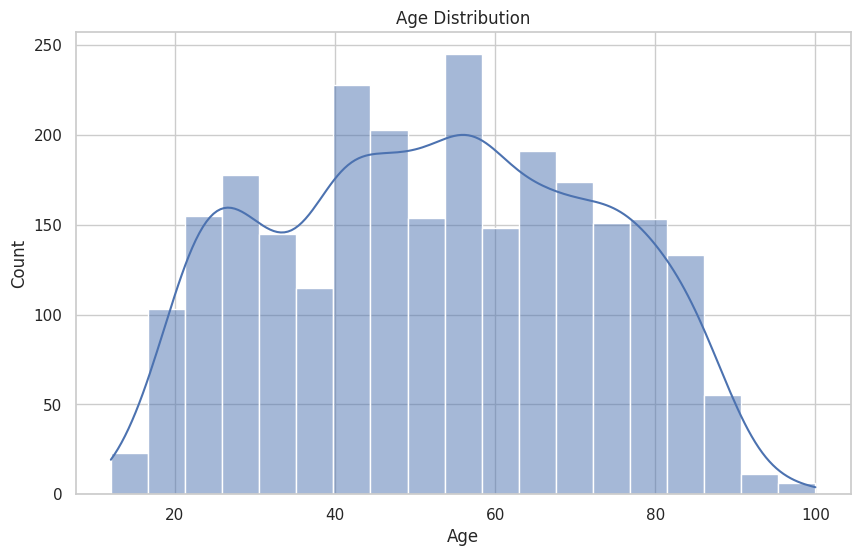

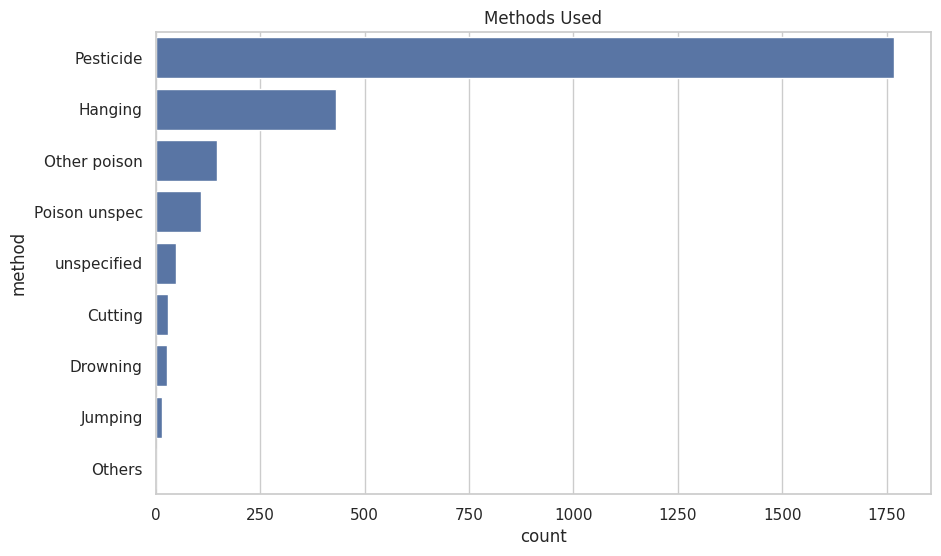

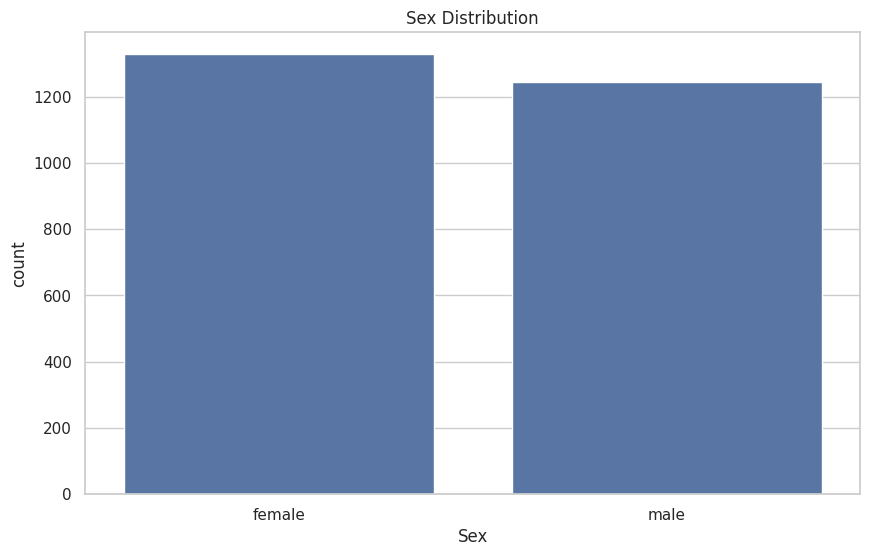

In [42]:
#Univariate Analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Age Distribution
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

# Method Count
sns.countplot(data=df, y='method', order=df['method'].value_counts().index)
plt.title("Methods Used")
plt.show()

# Sex Distribution
sns.countplot(data=df, x='Sex')
plt.title("Sex Distribution")
plt.show()


**5.** Bivariate Analysis

- Numerical vs Numerical

- Numerical vs Categorical

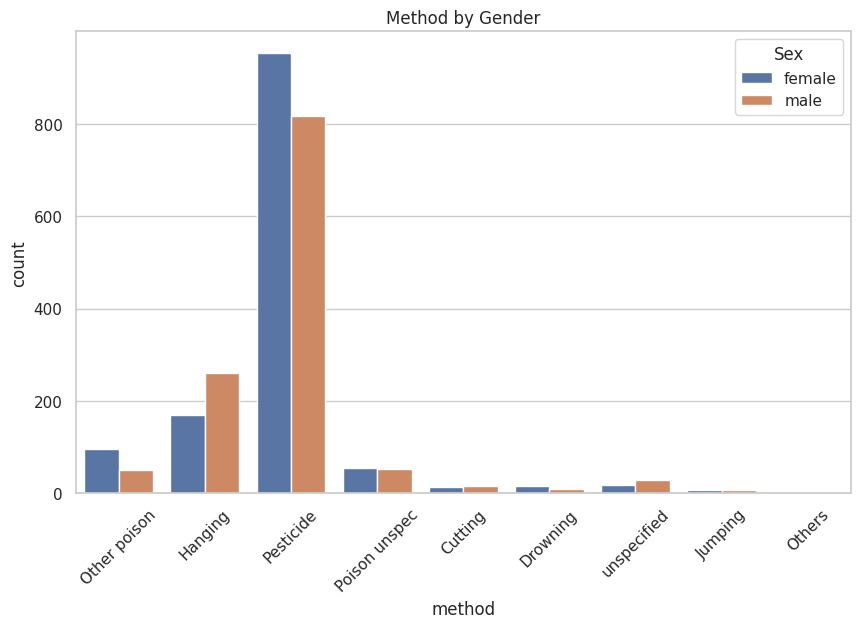

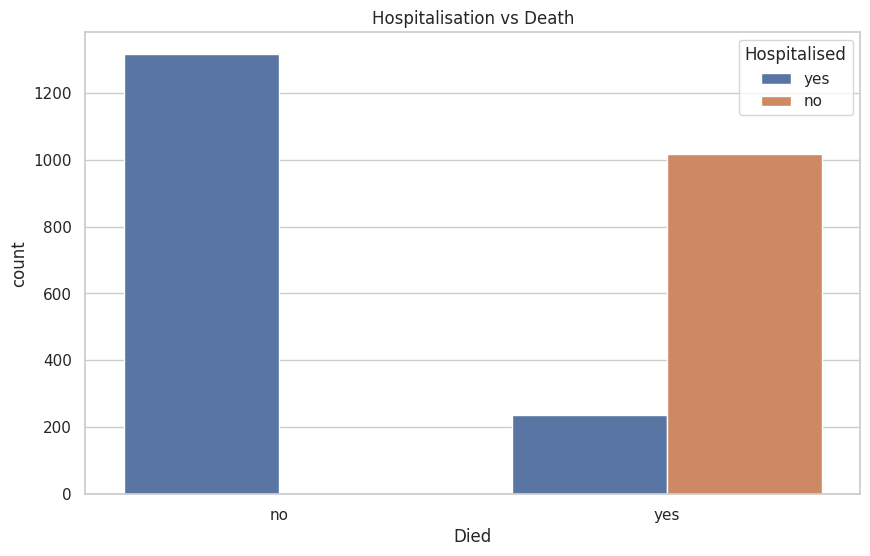

In [43]:
# Bivariate Analysis
# Method vs Sex
sns.countplot(data=df, x='method', hue='Sex')
plt.xticks(rotation=45)
plt.title("Method by Gender")
plt.show()

# Hospitalised vs Died
sns.countplot(data=df, hue='Hospitalised', x='Died')
plt.title("Hospitalisation vs Death")
plt.show()


**6.** Multivariate Analysis

- Pairplots / heatmaps

- Interaction effects among 3 or more variables

- Key insights

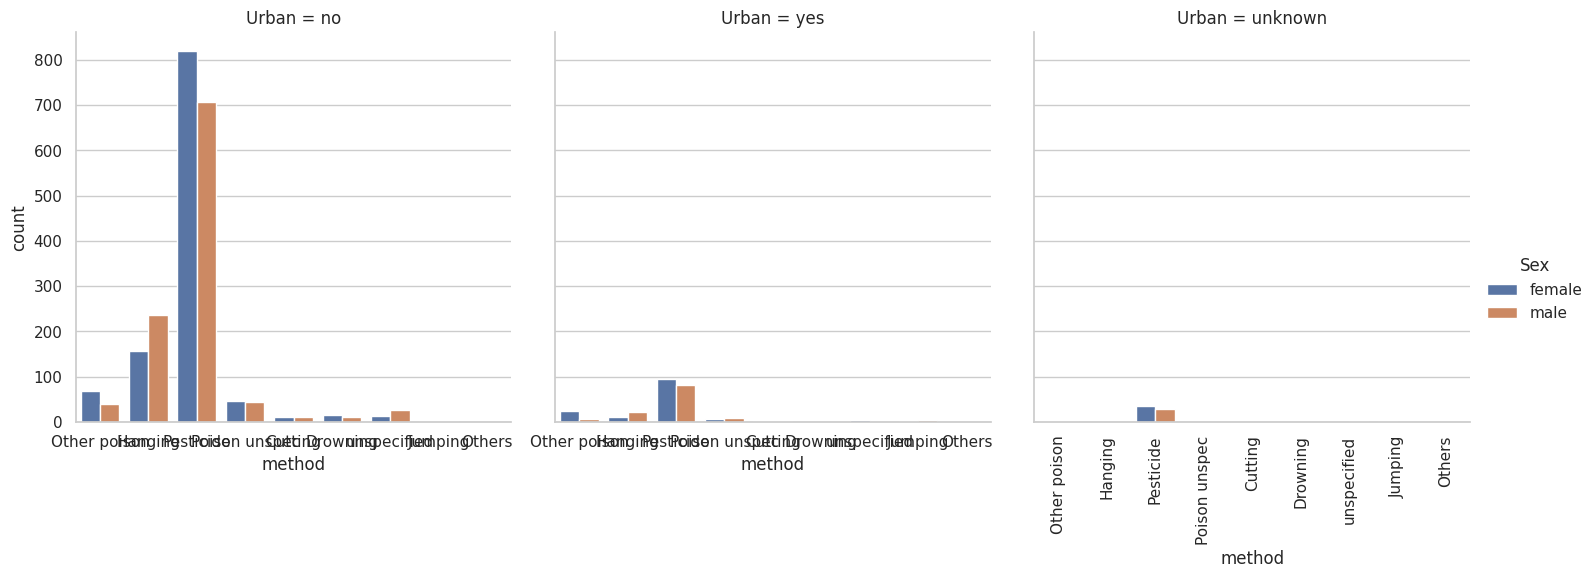

In [44]:
#Multivariate Analysis

# Age Group
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 65, 80, 100],
                        labels=['<18','18-35','36-50','51-65','66-80','80+'])

# Multivariate: Method vs Sex vs Urban
sns.catplot(data=df, x='method', hue='Sex', col='Urban', kind='count', height=5, aspect=1)
plt.xticks(rotation=90)
plt.show()


In [45]:
#Value count for additional columns
print("Sex:\n", df['Sex'].value_counts())
print("\nEducation:\n", df['Education'].value_counts())
print("\nOccupation:\n", df['Occupation'].value_counts())


Sex:
 Sex
female    1328
male      1243
Name: count, dtype: int64

Education:
 Education
Secondary    1280
primary       659
iliterate     533
unknown        80
Tertiary       19
Name: count, dtype: int64

Occupation:
 Occupation
farming             2032
household            248
others/unknown       156
professional          37
student               35
unemployed            30
business/service      21
worker                 6
others                 3
retiree                3
Name: count, dtype: int64


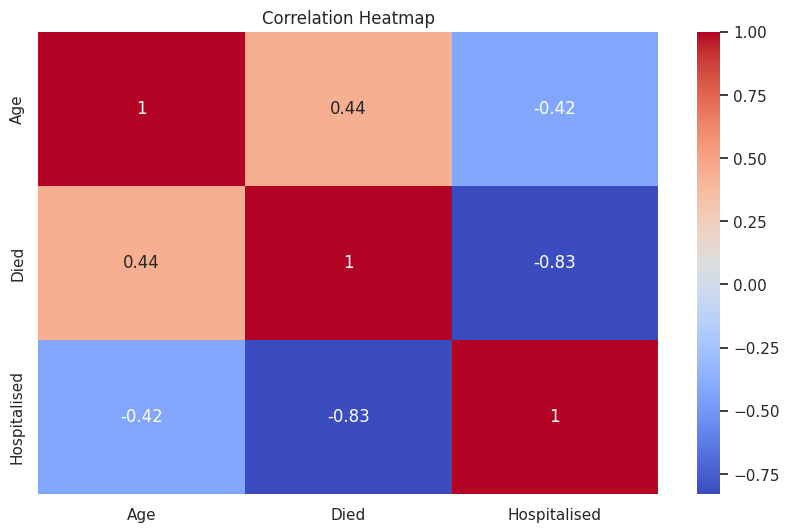

In [46]:
#Correlation Heatmap
df_corr = df.copy()
df_corr['Died'] = df_corr['Died'].map({'yes': 1, 'no': 0})
df_corr['Hospitalised'] = df_corr['Hospitalised'].map({'yes': 1, 'no': 0})

sns.heatmap(df_corr[['Age', 'Died', 'Hospitalised']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


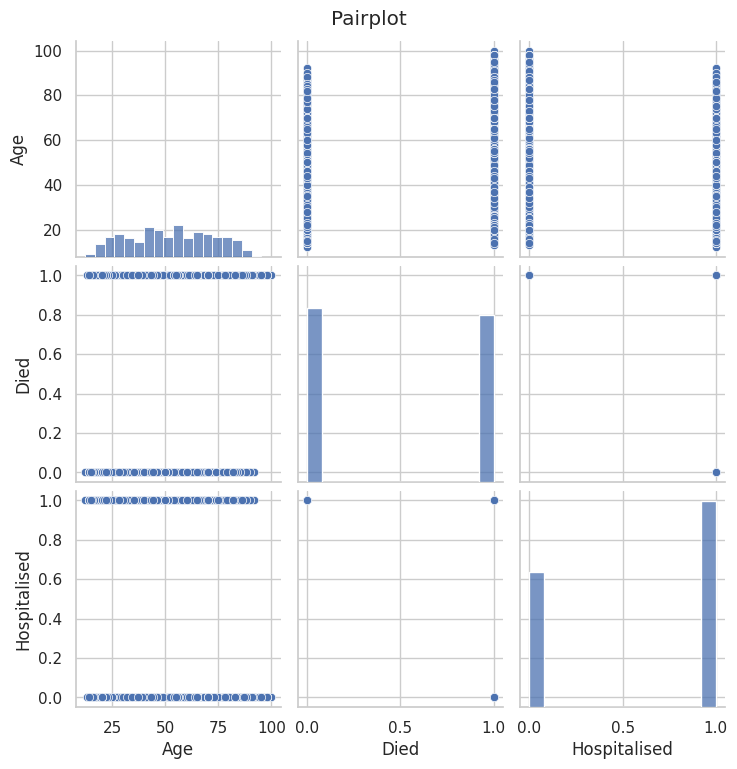

In [47]:
#Pairplot
# This will not add much with limited numerics but valid for full dataset
sns.pairplot(df_corr[['Age', 'Died', 'Hospitalised']])
plt.suptitle("Pairplot", y=1.02)
plt.show()


## Phase 2

**1.** Setup & Load

In [48]:
# Setup: imports, options, load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.neighbors import LocalOutlierFactor
from scipy.cluster.hierarchy import dendrogram, linkage
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10,6)
sns.set(style='whitegrid')

# Load dataset (change url if needed)
data_url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/SuicideChina.csv"
df = pd.read_csv(data_url)
print("Data loaded. Shape:", df.shape)
display(df.head())
display(df.info())

Data loaded. Shape: (2571, 12)


rownames  Person_ID Hospitalised Died Urban  Year  Month     Sex  Age  \
0         1          1          yes   no    no  2010     12  female   39   
1         2          2           no  yes    no  2009      3    male   83   
2         3          3           no  yes    no  2010      2    male   60   
3         4          4           no  yes    no  2011      1    male   73   
4         5          5          yes   no    no  2009      8    male   51   

   Education Occupation        method  
0  Secondary  household  Other poison  
1    primary    farming       Hanging  
2    primary    farming       Hanging  
3    primary    farming       Hanging  
4  Secondary    farming     Pesticide

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rownames      2571 non-null   int64 
 1   Person_ID     2571 non-null   int64 
 2   Hospitalised  2571 non-null   object
 3   Died          2571 non-null   object
 4   Urban         2571 non-null   object
 5   Year          2571 non-null   int64 
 6   Month         2571 non-null   int64 
 7   Sex           2571 non-null   object
 8   Age           2571 non-null   int64 
 9   Education     2571 non-null   object
 10  Occupation    2571 non-null   object
 11  method        2571 non-null   object
dtypes: int64(5), object(7)
memory usage: 241.2+ KB


None

**2.** Quick overview + cleaning decisions

In [49]:
# Quick summary and cleaning plan
print("Columns and dtypes:")
display(df.dtypes)

# Missing values
missing = df.isnull().sum().sort_values(ascending=False)
display(missing[missing>0])

# Duplicates
print("Duplicate rows:", df.duplicated().sum())

# Basic cleaning decisions (DO NOT AUTO-DROP anything without checking)
# - If columns with >50% missing, consider dropping or documenting
# - If rows have missing targets, you may drop them for analyses that require target
pct_missing = (df.isnull().mean()*100).round(2).sort_values(ascending=False)
display(pct_missing)

# Example: if you want to drop columns with >60% missing (uncomment to apply)
# cols_to_drop = pct_missing[pct_missing > 60].index.tolist()
# df.drop(columns=cols_to_drop, inplace=True)
# print("Dropped columns:", cols_to_drop)

Columns and dtypes:


rownames         int64
Person_ID        int64
Hospitalised    object
Died            object
Urban           object
Year             int64
Month            int64
Sex             object
Age              int64
Education       object
Occupation      object
method          object
dtype: object

Series([], dtype: int64)

Duplicate rows: 0


rownames        0.0
Person_ID       0.0
Hospitalised    0.0
Died            0.0
Urban           0.0
Year            0.0
Month           0.0
Sex             0.0
Age             0.0
Education       0.0
Occupation      0.0
method          0.0
dtype: float64

**3.** 1D Analysis — stats + plots

- Numerical summary: skewness, kurtosis, quantiles, IQR, outlier counts

In [50]:
# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
print("Numeric columns:", numeric_cols)
print("Categorical columns:", cat_cols)

# Descriptive statistics
desc = df[numeric_cols].describe().T
desc['skew'] = df[numeric_cols].skew().round(4)
desc['kurtosis'] = df[numeric_cols].apply(kurtosis).round(4)
q = df[numeric_cols].quantile([0.01,0.05,0.25,0.5,0.75,0.95,0.99]).T
desc = desc.join(q)
# IQR and outlier counts using 1.5*IQR rule
desc['IQR'] = desc[0.75] - desc[0.25]
def count_outliers(col):
    s = df[col].dropna()
    q1 = s.quantile(0.25); q3 = s.quantile(0.75); iqr = q3-q1
    low = q1 - 1.5*iqr; high = q3 + 1.5*iqr
    return ((s < low) | (s > high)).sum()
desc['outlier_count_1.5IQR'] = [count_outliers(c) for c in desc.index]
display(desc)

# Show columns with highest skew (absolute)
print("Top skewed numeric features:")
display(desc['skew'].abs().sort_values(ascending=False).head(10))

Numeric columns: ['rownames', 'Person_ID', 'Year', 'Month', 'Age']
Categorical columns: ['Hospitalised', 'Died', 'Urban', 'Sex', 'Education', 'Occupation', 'method']


count         mean         std     min     25%     50%     75%  \
rownames   2571.0  1286.000000  742.328095     1.0   643.5  1286.0  1928.5   
Person_ID  2571.0  1286.000000  742.328095     1.0   643.5  1286.0  1928.5   
Year       2571.0  2010.045508    0.791412  2009.0  2009.0  2010.0  2011.0   
Month      2571.0     6.298327    3.202515     1.0     4.0     6.0     9.0   
Age        2571.0    52.630883   19.783878    12.0    37.0    53.0    69.0   

              max    skew  kurtosis    0.01    0.05    0.25     0.5    0.75  \
rownames   2571.0  0.0000   -1.2000    26.7   129.5   643.5  1286.0  1928.5   
Person_ID  2571.0  0.0000   -1.2000    26.7   129.5   643.5  1286.0  1928.5   
Year       2011.0 -0.0809   -1.3988  2009.0  2009.0  2009.0  2010.0  2011.0   
Month        12.0  0.0171   -1.0336     1.0     1.0     4.0     6.0     9.0   
Age         100.0  0.0143   -1.0036    17.0    22.0    37.0    53.0    69.0   

             0.95    0.99     IQR  outlier_count_1.5IQR  
rownames   2442.5  2545.3  1285.0                     0  
Person_ID  2442.5  2545.3  1285.0                     0  
Year       2011.0  2011.0     2.0                     0  
Month        12.0    12.0     5.0                     0  
Age          84.0    89.3    32.0                     0

Top skewed numeric features:


Year         0.0809
Month        0.0171
Age          0.0143
rownames     0.0000
Person_ID    0.0000
Name: skew, dtype: float64

- 1D plots: histograms, kde, box, violin, frequency tables for cats

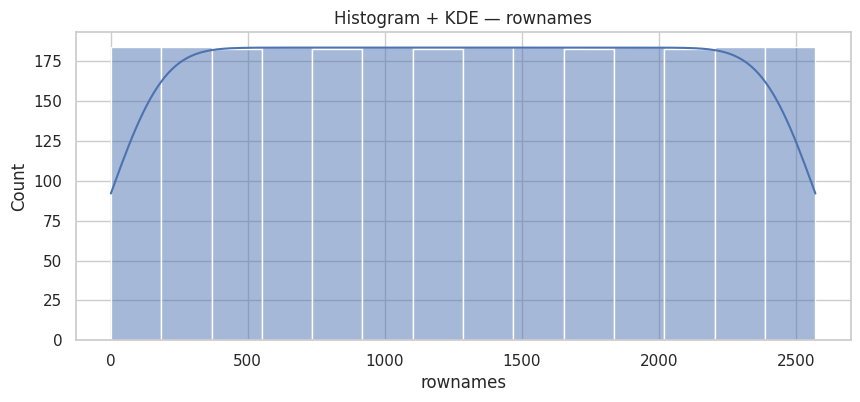

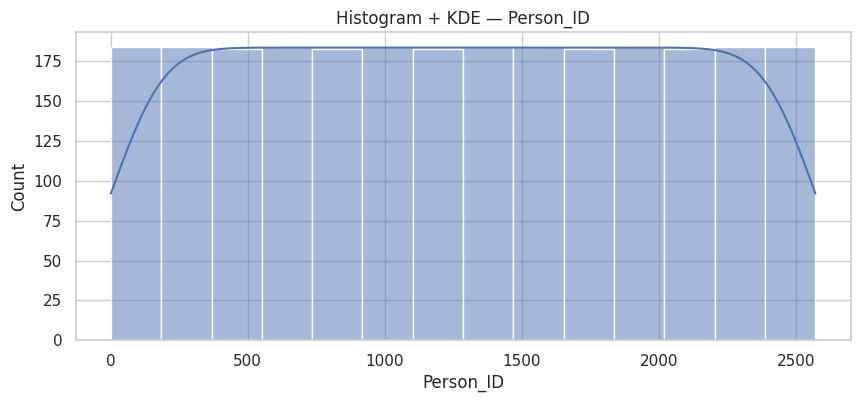

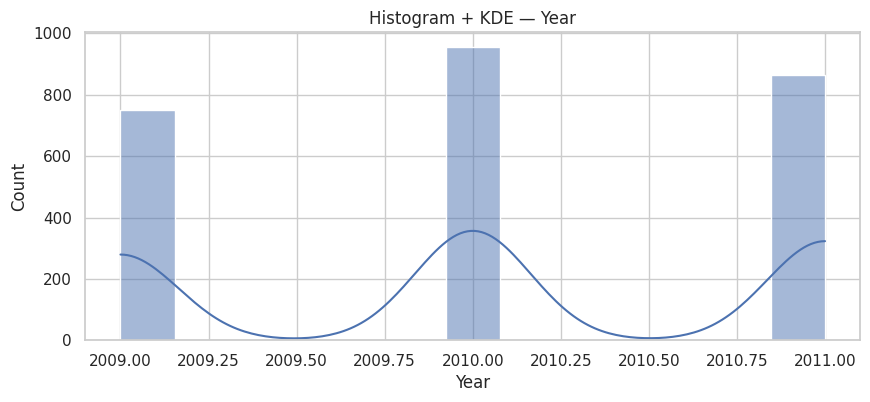

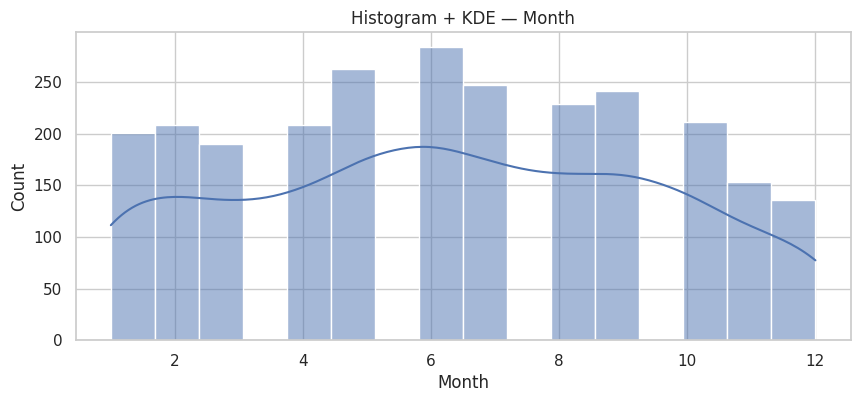

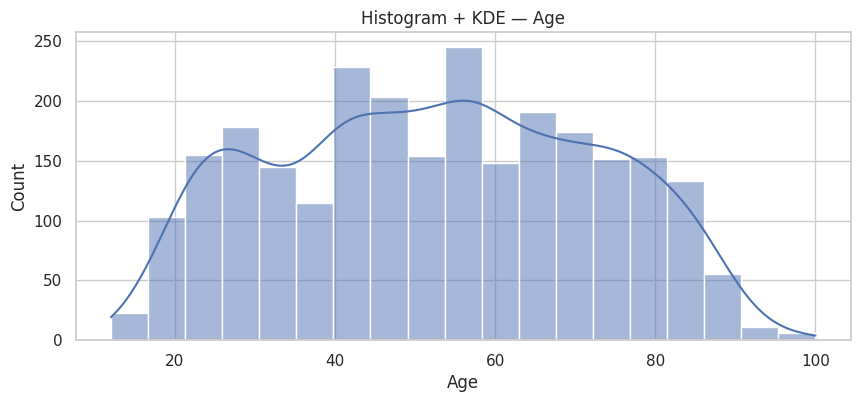

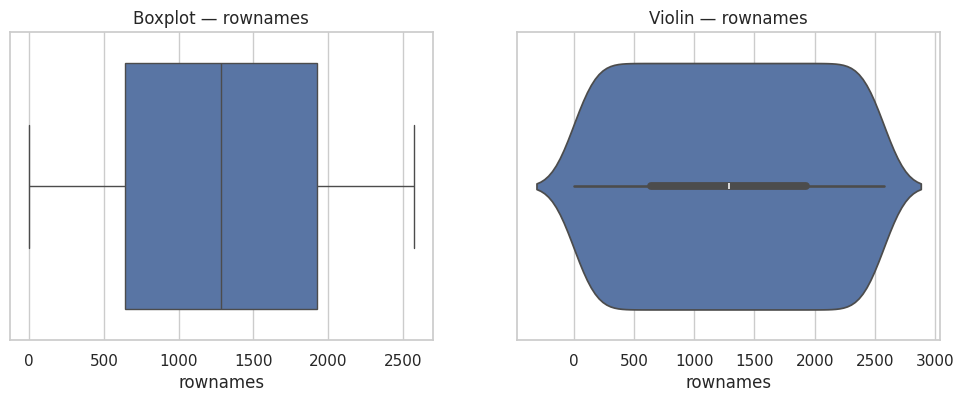

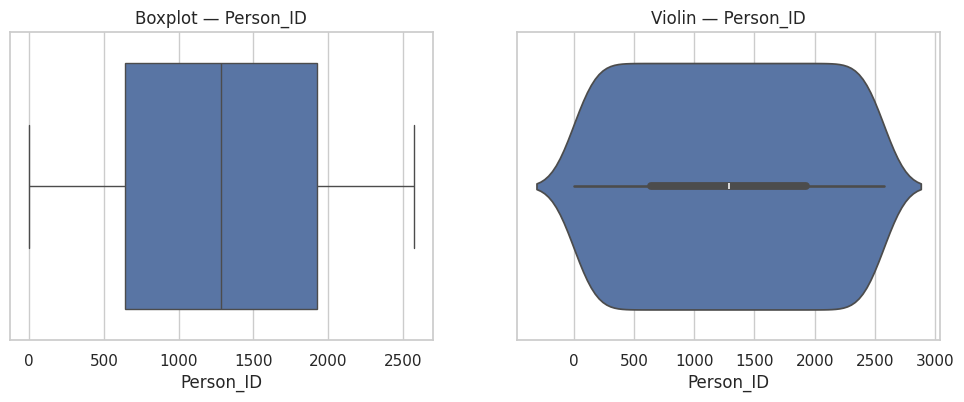

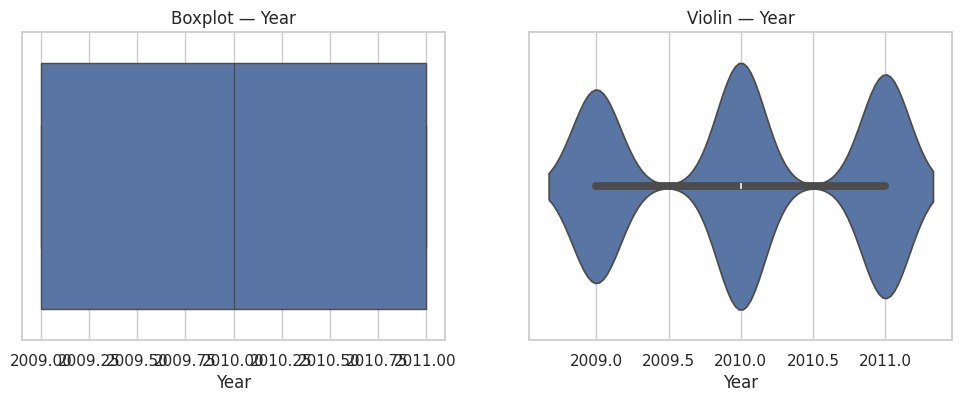

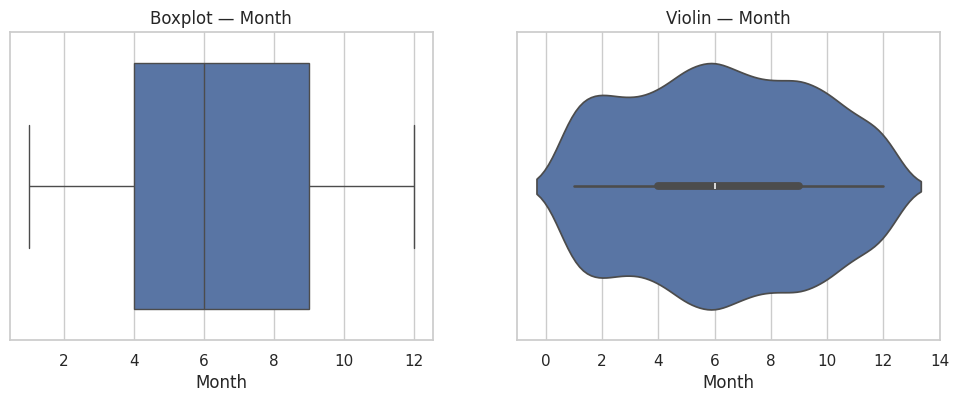

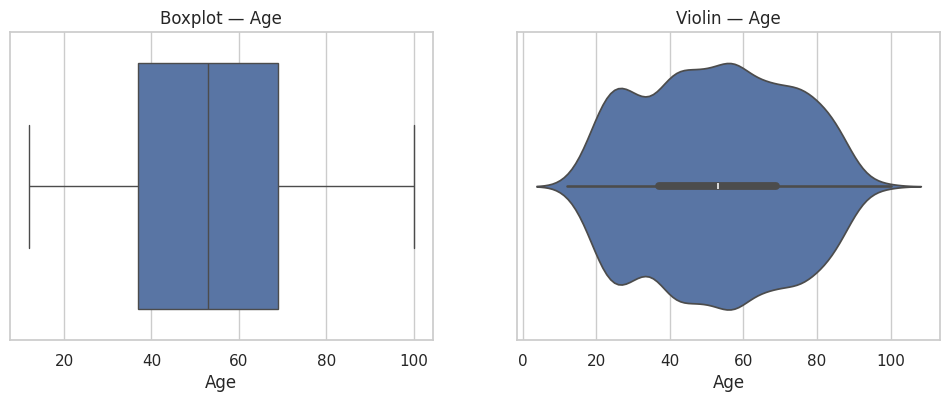

Value counts for Hospitalised (top 10):


Hospitalised
yes    1553
no     1018
Name: count, dtype: int64

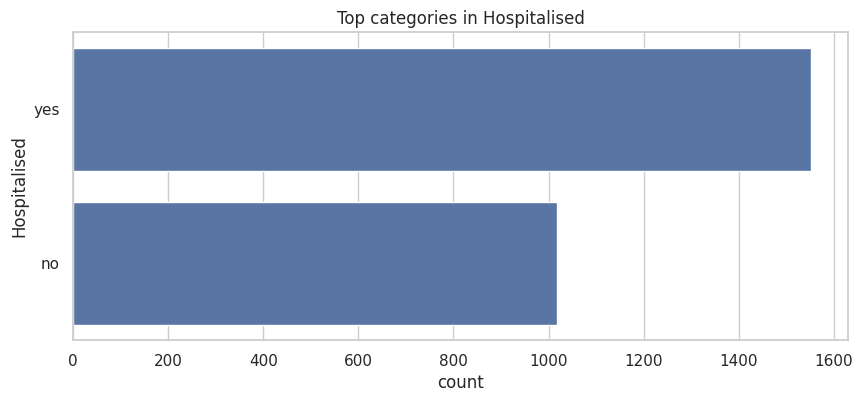

Value counts for Died (top 10):


Died
no     1315
yes    1256
Name: count, dtype: int64

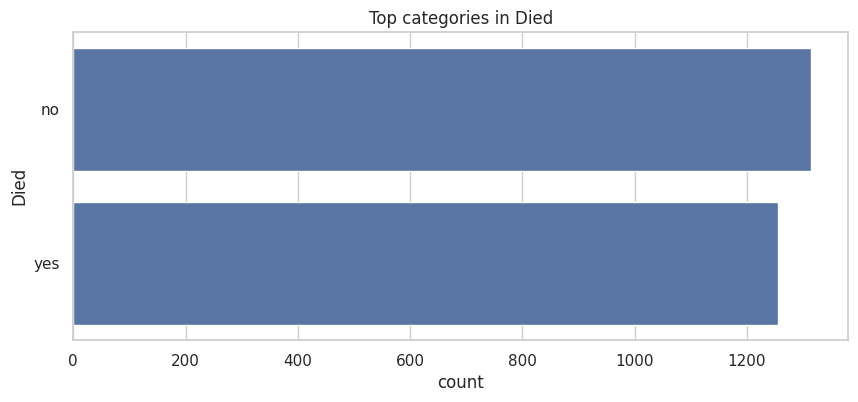

Value counts for Urban (top 10):


Urban
no         2213
yes         277
unknown      81
Name: count, dtype: int64

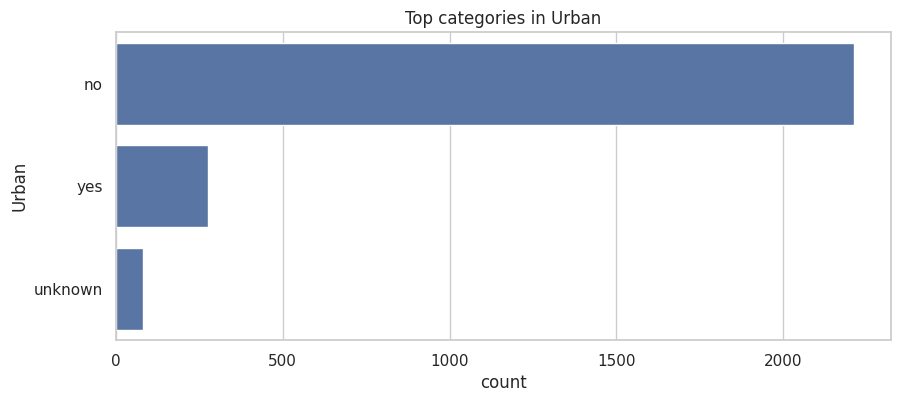

Value counts for Sex (top 10):


Sex
female    1328
male      1243
Name: count, dtype: int64

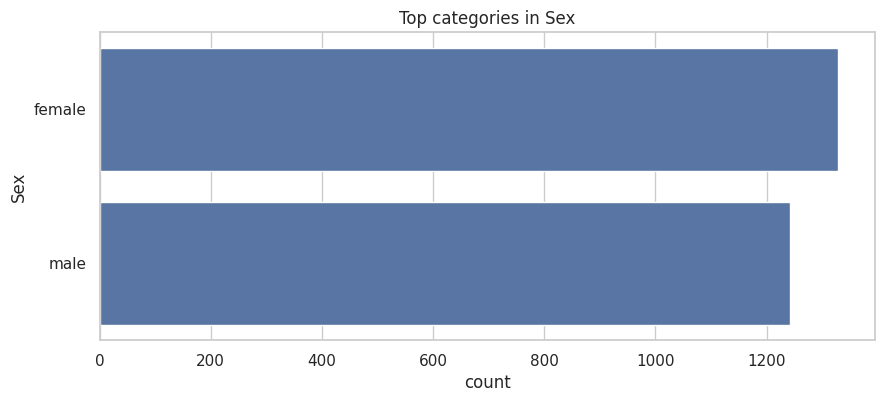

Value counts for Education (top 10):


Education
Secondary    1280
primary       659
iliterate     533
unknown        80
Tertiary       19
Name: count, dtype: int64

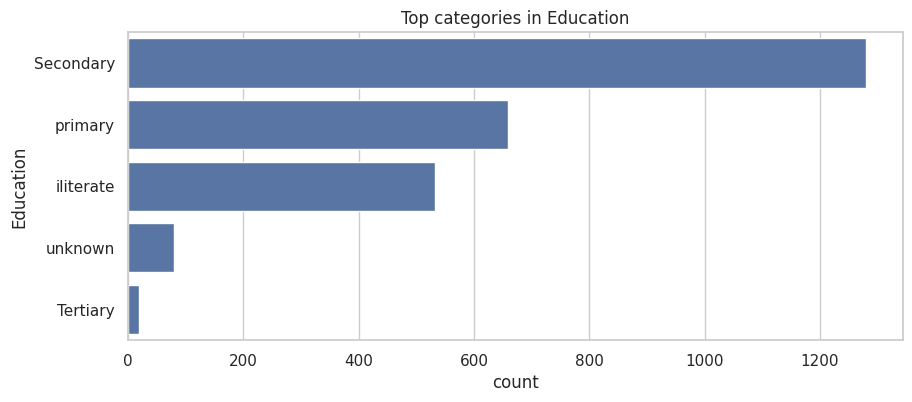

Value counts for Occupation (top 10):


Occupation
farming             2032
household            248
others/unknown       156
professional          37
student               35
unemployed            30
business/service      21
worker                 6
others                 3
retiree                3
Name: count, dtype: int64

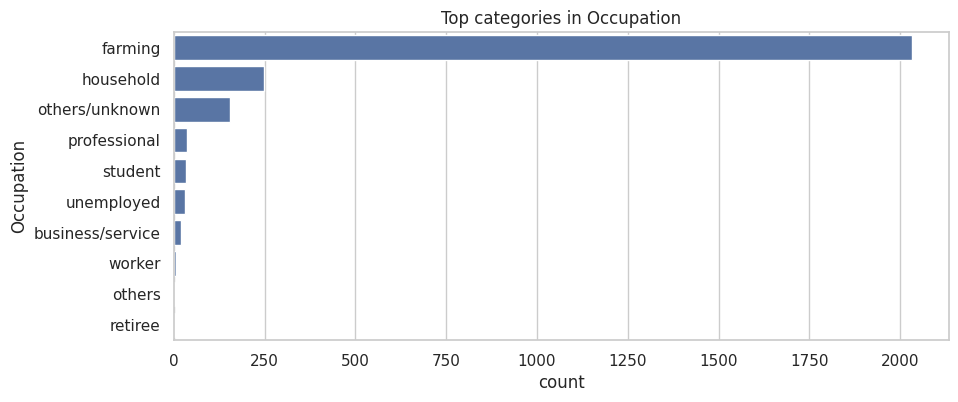

Value counts for method (top 10):


method
Pesticide        1768
Hanging           431
Other poison      146
Poison unspec     107
unspecified        48
Cutting            29
Drowning           26
Jumping            15
Others              1
Name: count, dtype: int64

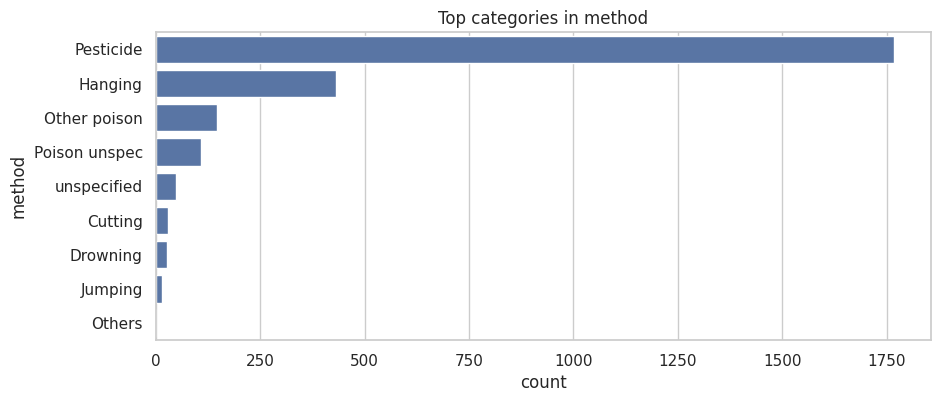

In [51]:
# Use sample for heavy columns
sample_frac = 1.0 if len(df) <= 5000 else 0.2

# Histograms + KDE
for c in numeric_cols:
    plt.figure(figsize=(10,4))
    sns.histplot(df[c].dropna().sample(frac=sample_frac, random_state=1), kde=True)
    plt.title(f"Histogram + KDE — {c}")
    plt.show()

# Box + Violin
for c in numeric_cols:
    fig, ax = plt.subplots(1,2, figsize=(12,4))
    sns.boxplot(x=df[c].dropna().sample(frac=sample_frac, random_state=1), ax=ax[0])
    ax[0].set_title(f"Boxplot — {c}")
    sns.violinplot(x=df[c].dropna().sample(frac=sample_frac, random_state=1), ax=ax[1])
    ax[1].set_title(f"Violin — {c}")
    plt.show()

# Categorical frequency & barplot
for c in cat_cols:
    counts = df[c].value_counts(dropna=False)
    print(f"Value counts for {c} (top 10):")
    display(counts.head(10))
    plt.figure(figsize=(10,4))
    sns.countplot(y=c, data=df, order=counts.index[:20])
    plt.title(f"Top categories in {c}")
    plt.show()

**4.** 2D Analysis — detailed comparisons

- Numeric vs Numeric: correlation matrix, pairplot (sample), regression for top pairs

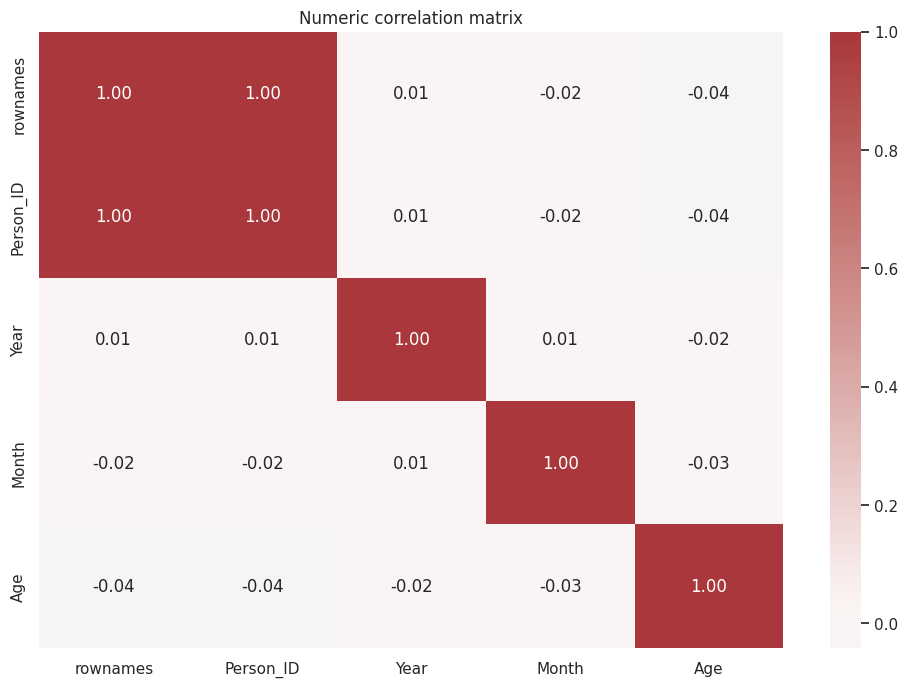

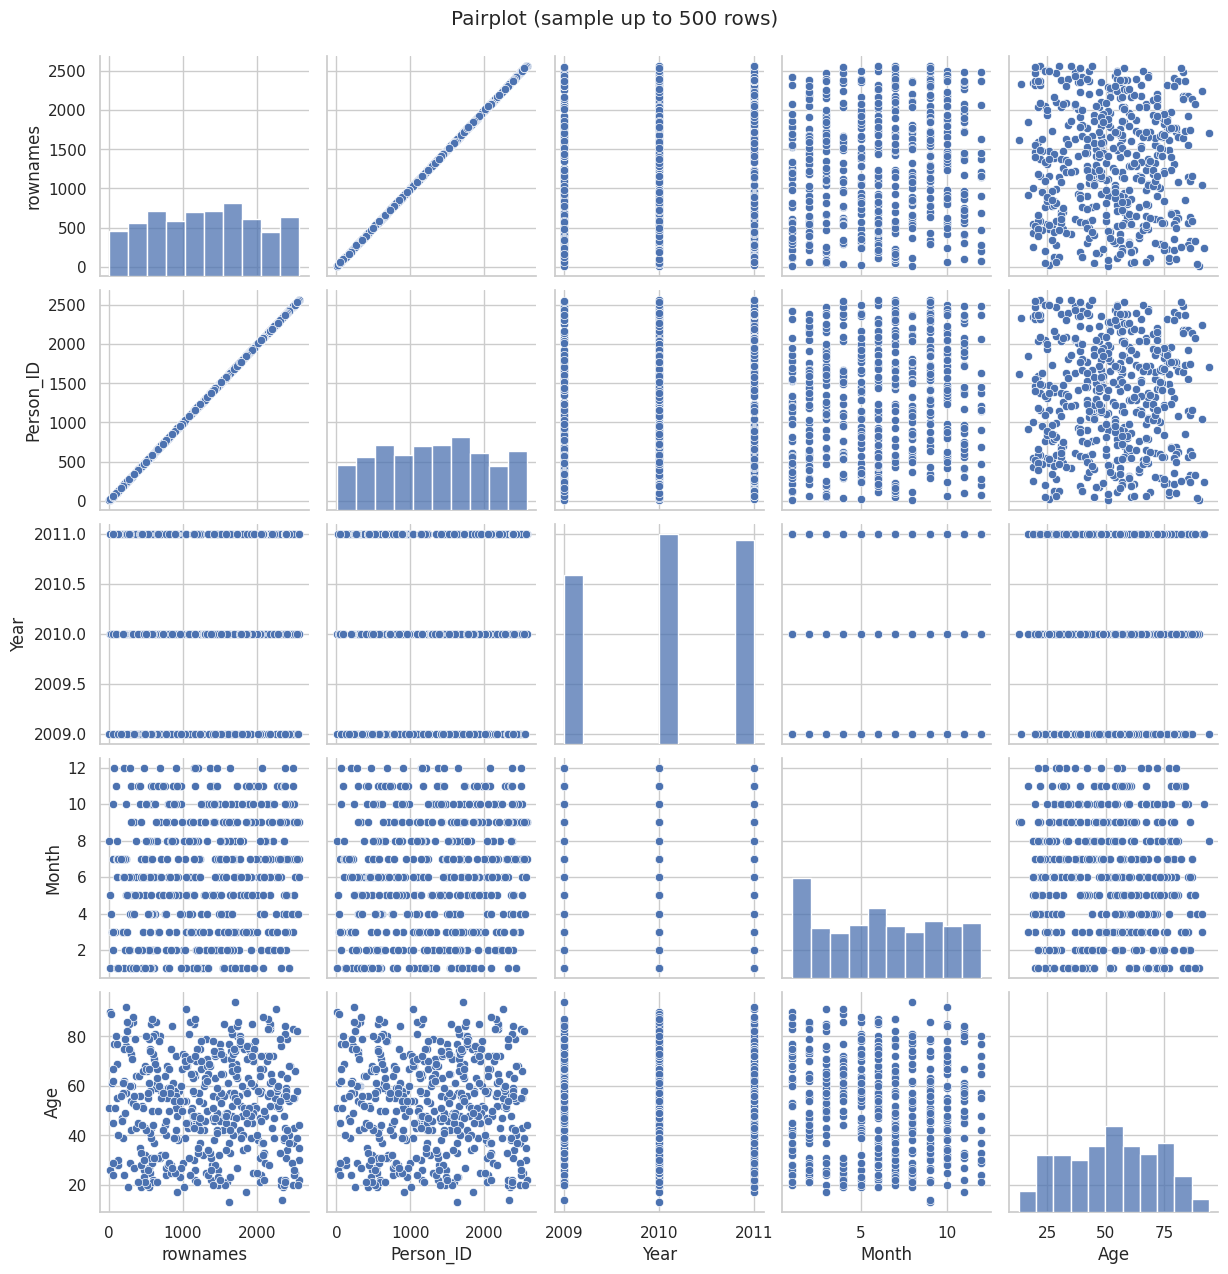

Top correlated pairs:
 rownames   Person_ID    1.000000
           Age          0.040988
Person_ID  Age          0.040988
dtype: float64


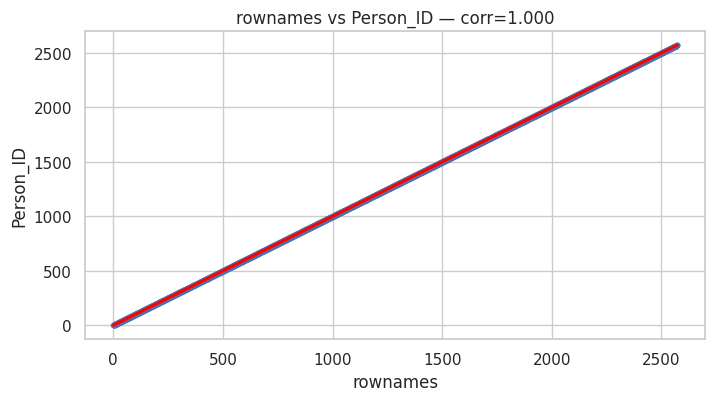

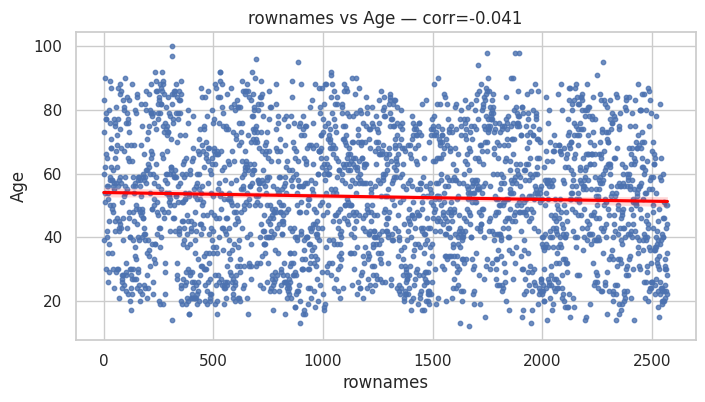

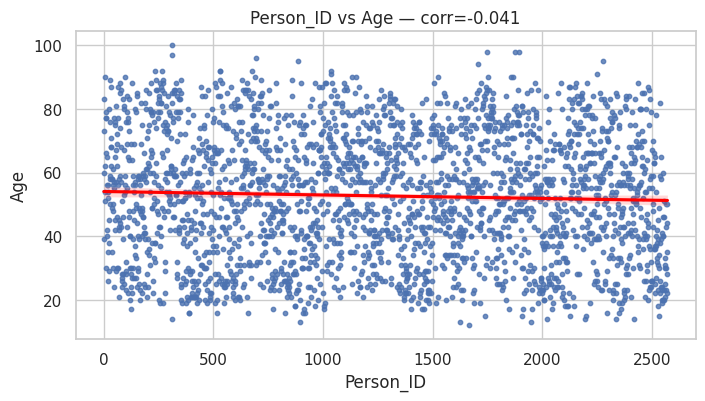

In [52]:
# Correlation matrix
corr = df[numeric_cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title("Numeric correlation matrix")
plt.show()

# Pairplot on sample (safe-guard large data)
pair_sample = df[numeric_cols].dropna().sample(n=min(500, len(df)), random_state=1)
sns.pairplot(pair_sample)
plt.suptitle("Pairplot (sample up to 500 rows)", y=1.02)
plt.show()

# Scatter + regression for top 3 absolute correlated pairs
corr_triu = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
top_pairs = corr_triu.abs().stack().sort_values(ascending=False).head(3)
print("Top correlated pairs:\n", top_pairs)
for (a,b), val in top_pairs.items():
    plt.figure(figsize=(8,4))
    sns.regplot(x=df[a], y=df[b], scatter_kws={'s':10}, line_kws={'color':'red'})
    plt.title(f"{a} vs {b} — corr={corr.loc[a,b]:.3f}")
    plt.show()

- Numeric vs Categorical: boxplots, violin, group statistics

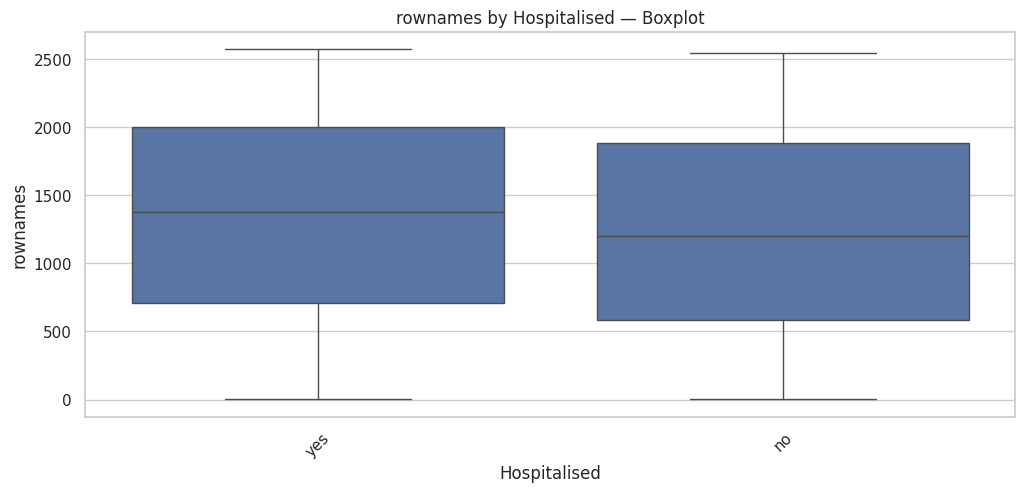

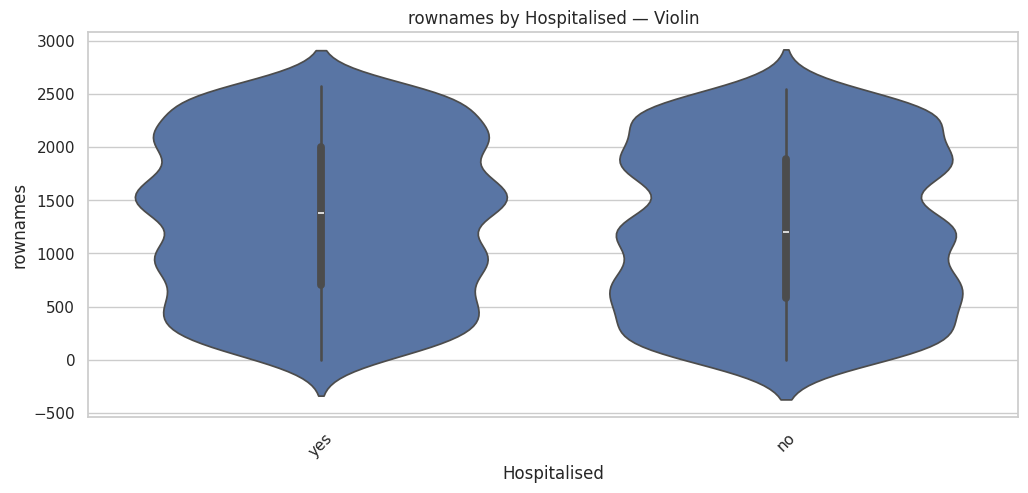

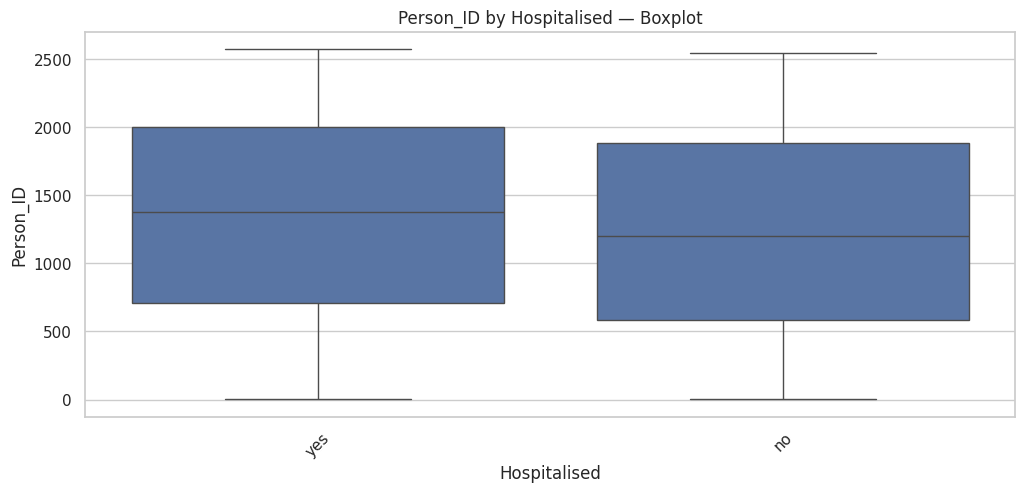

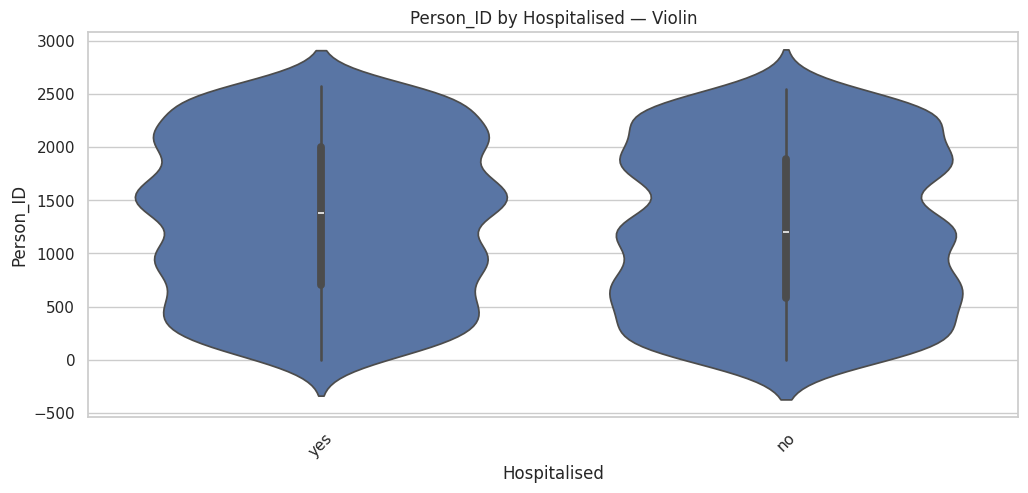

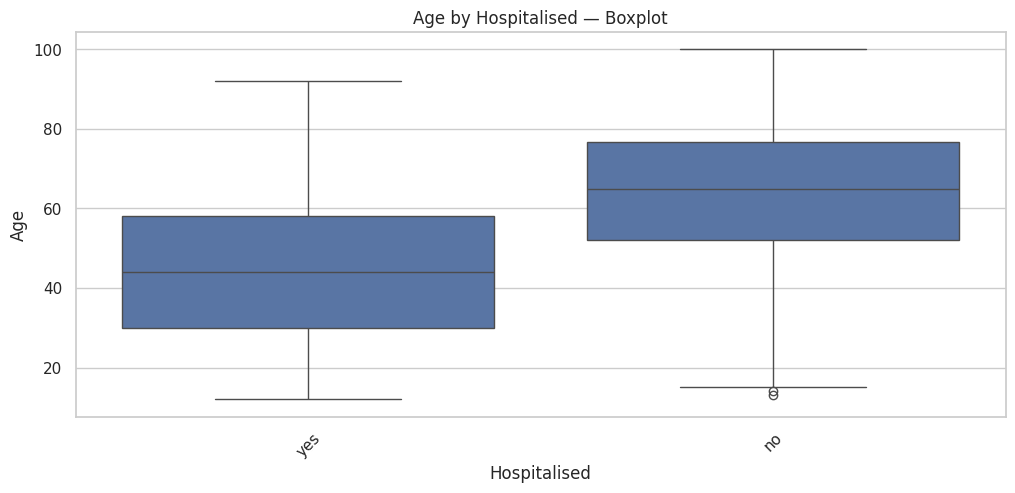

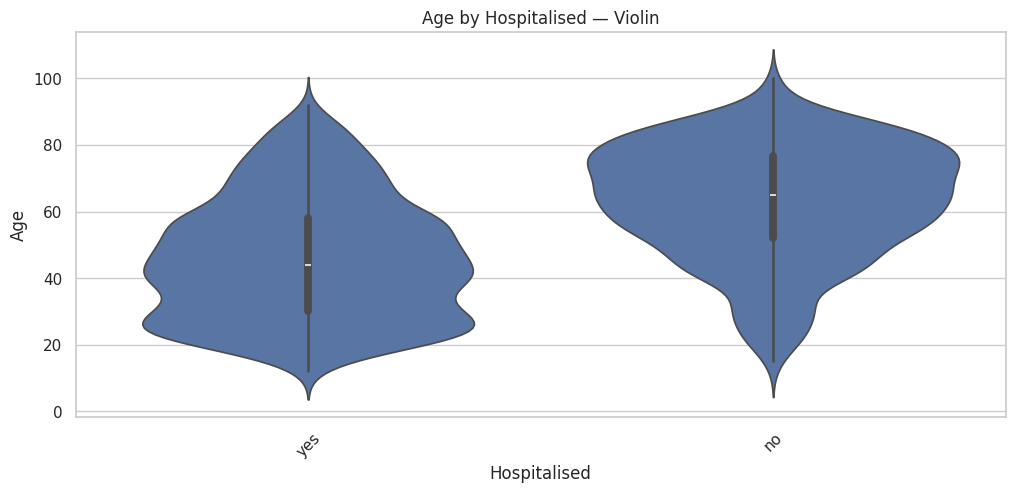

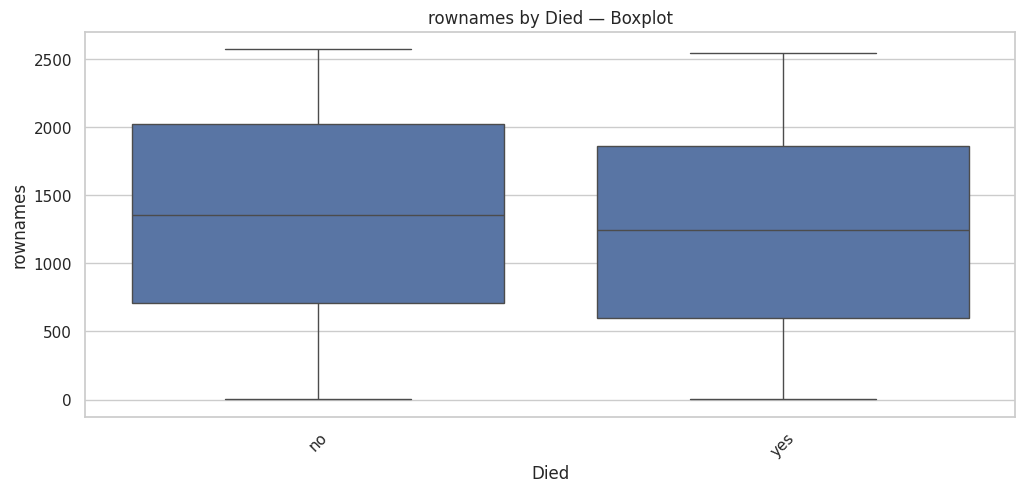

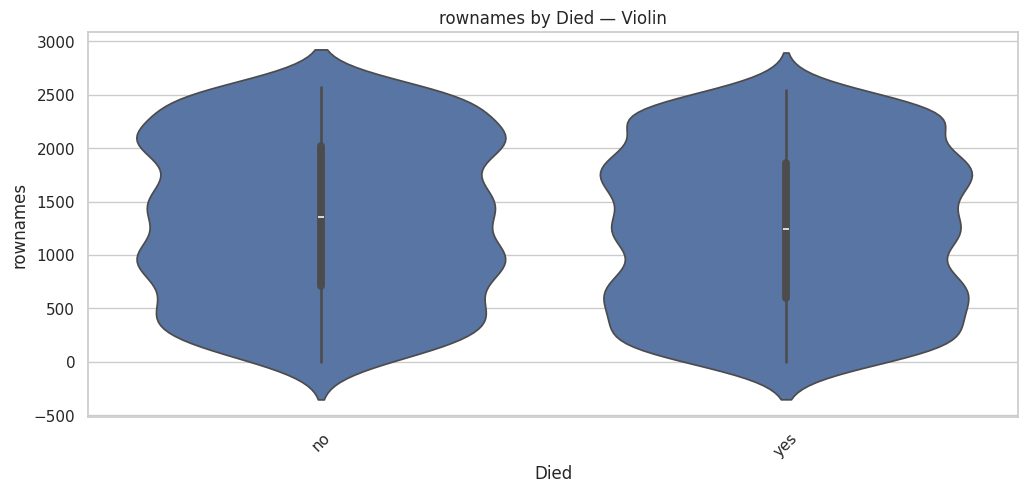

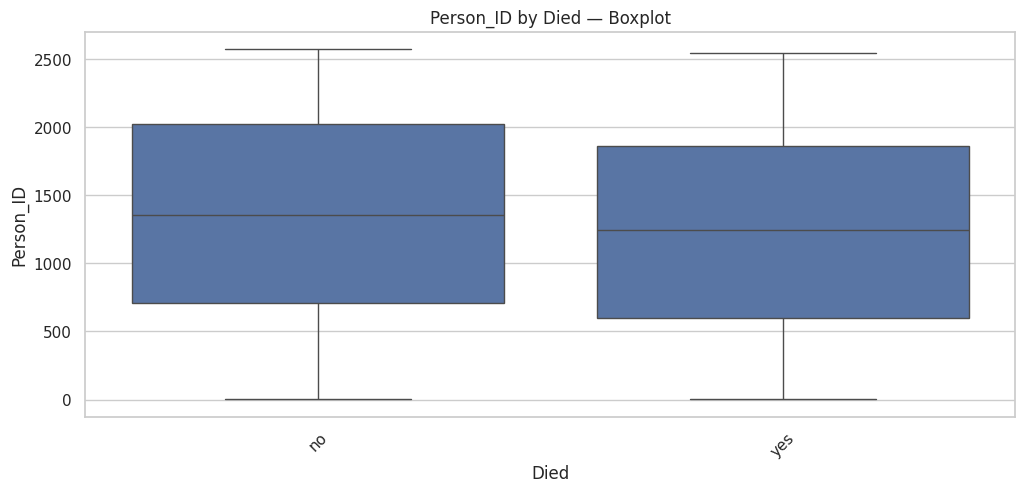

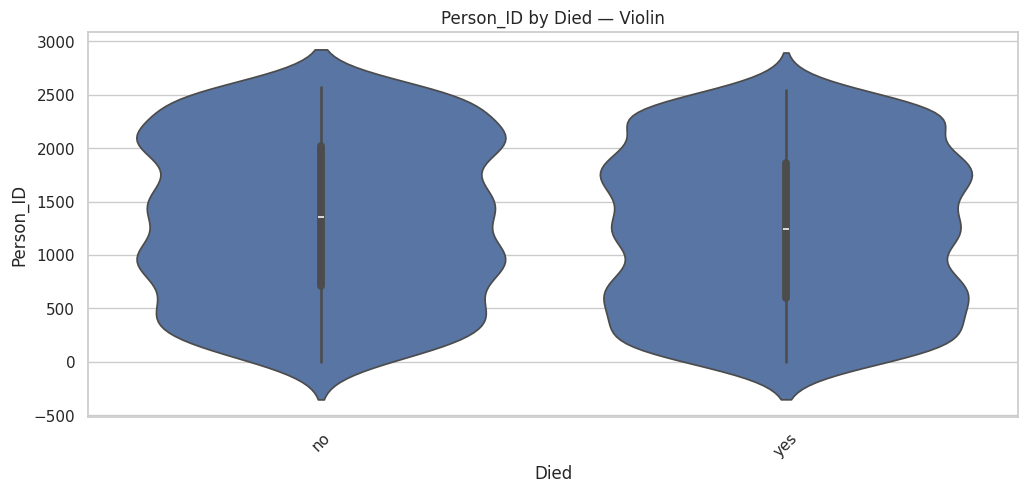

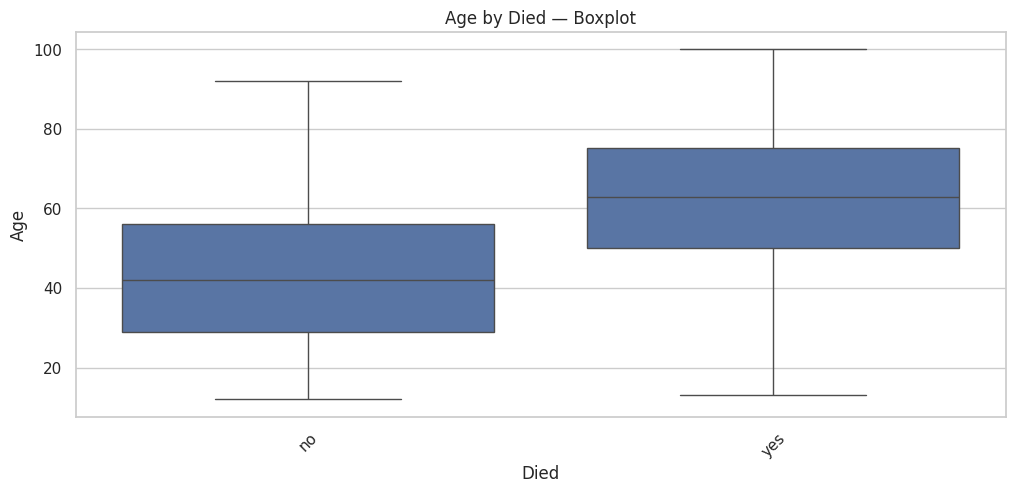

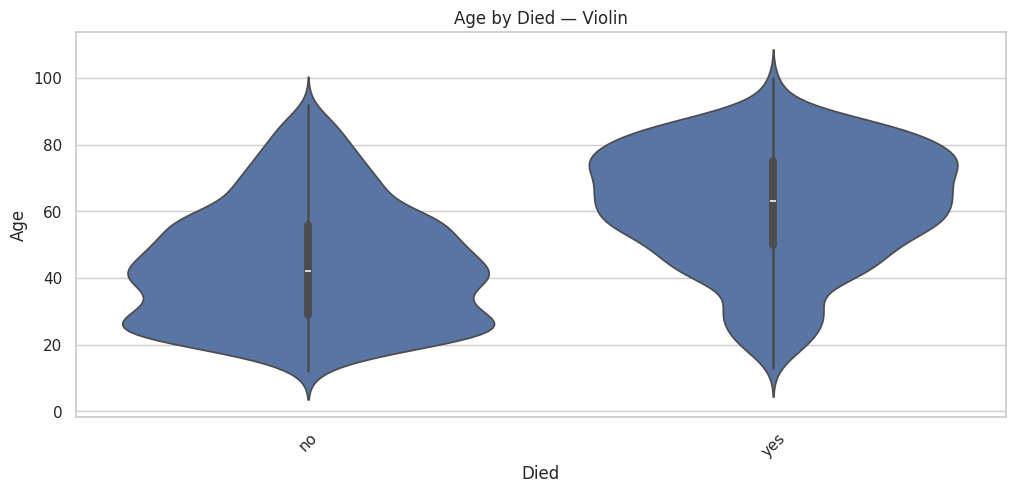

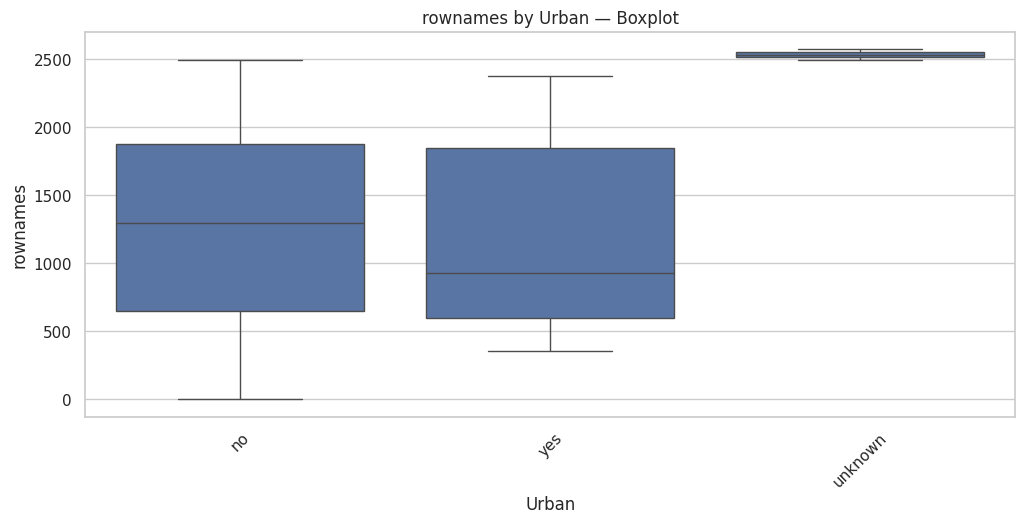

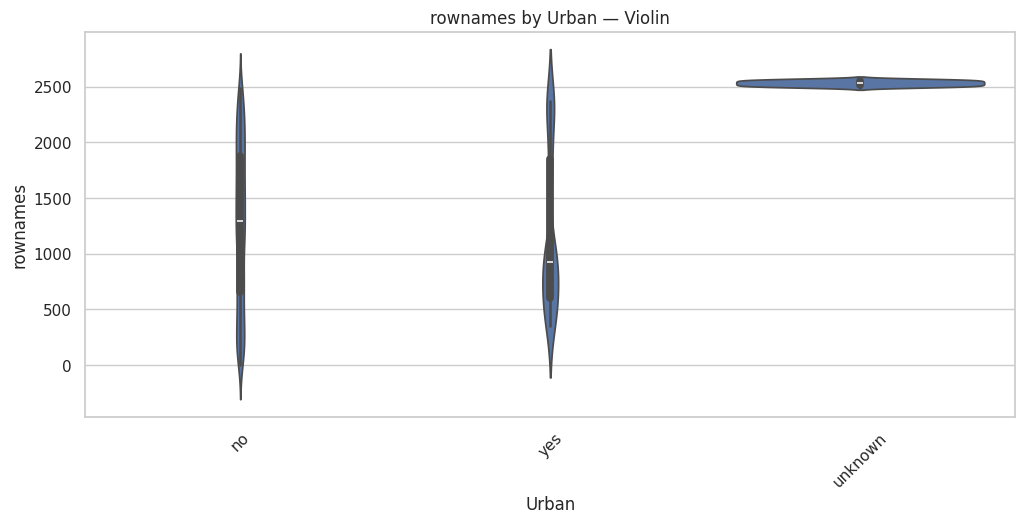

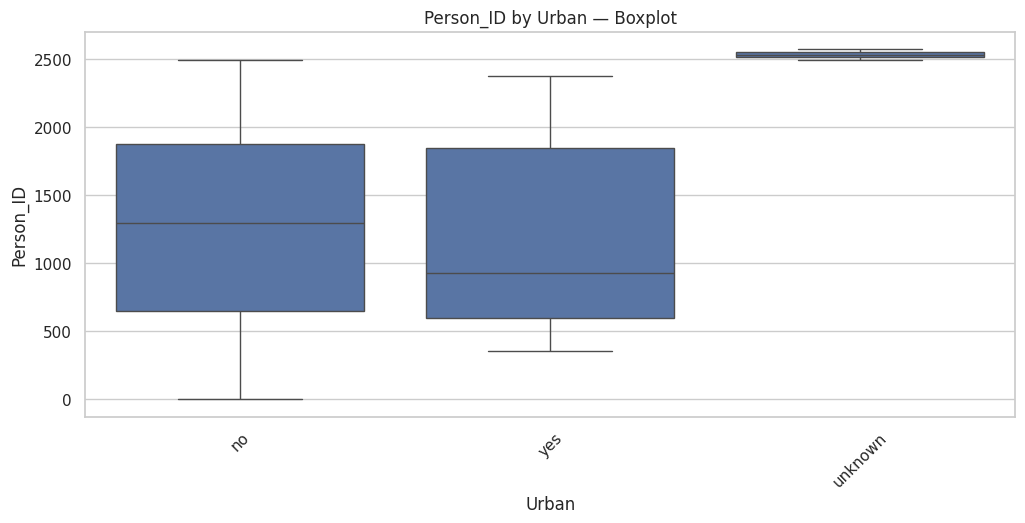

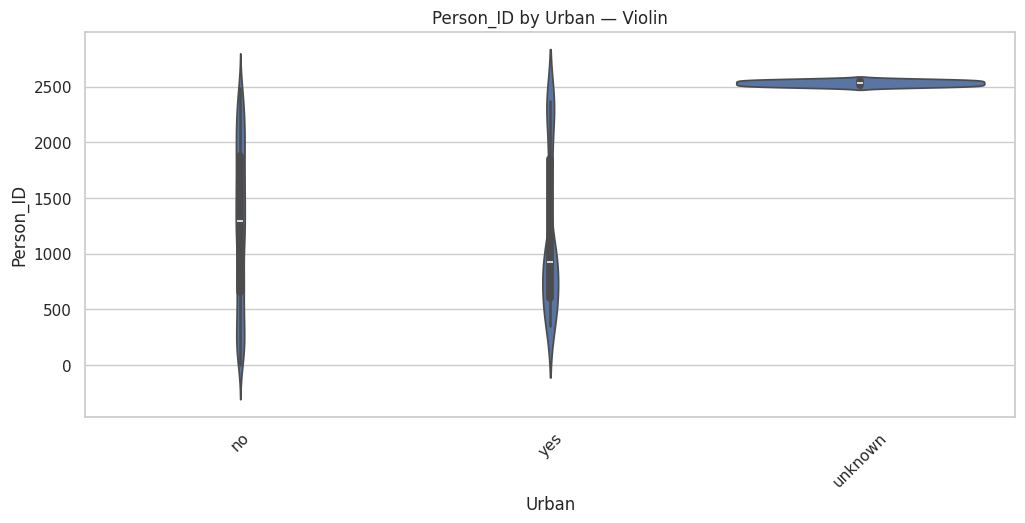

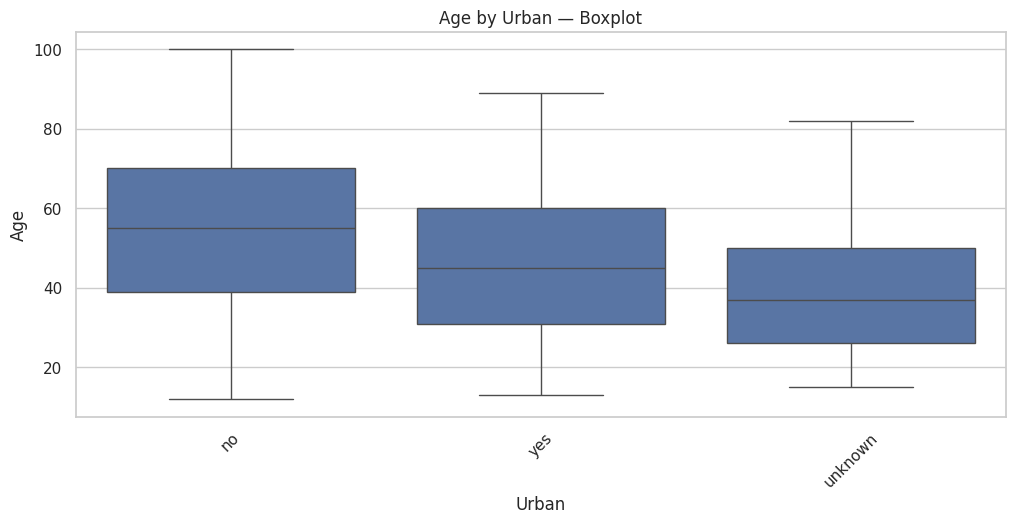

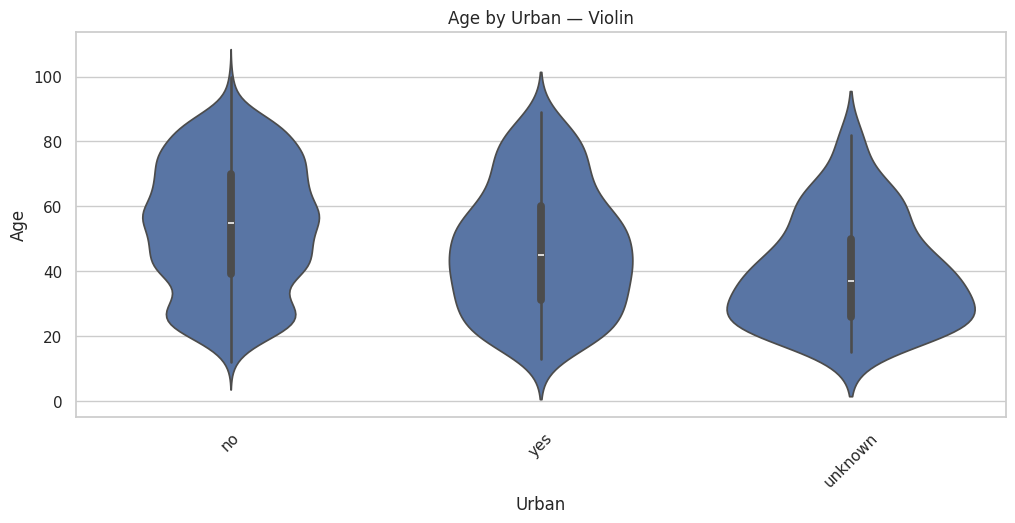

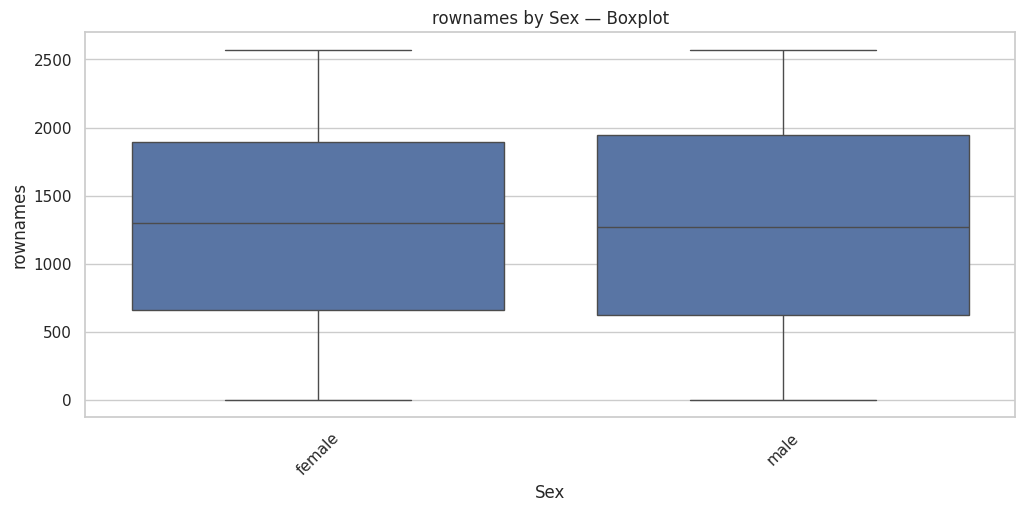

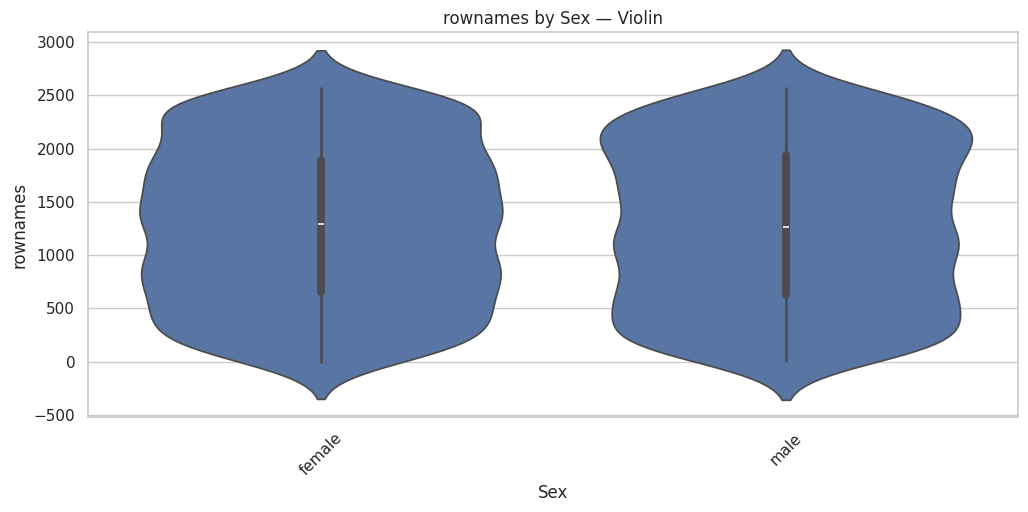

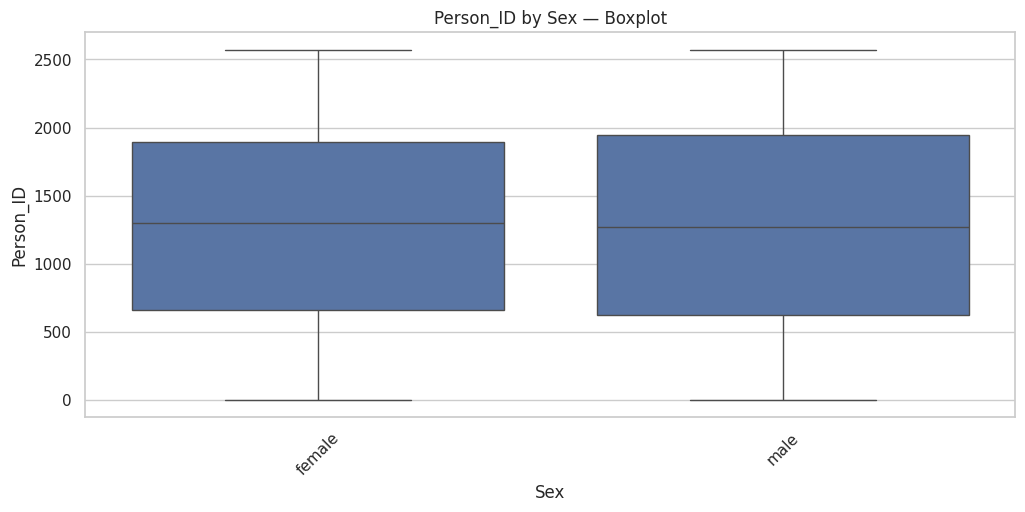

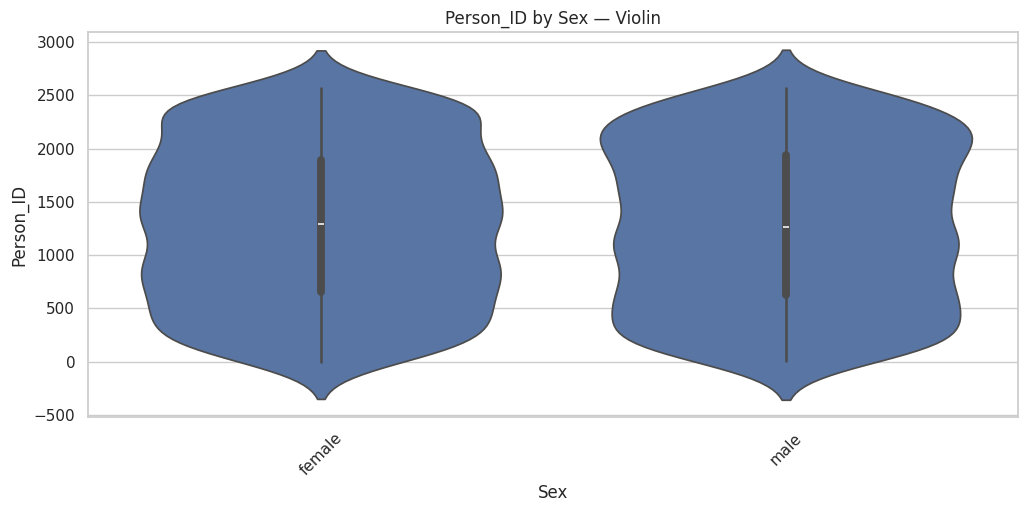

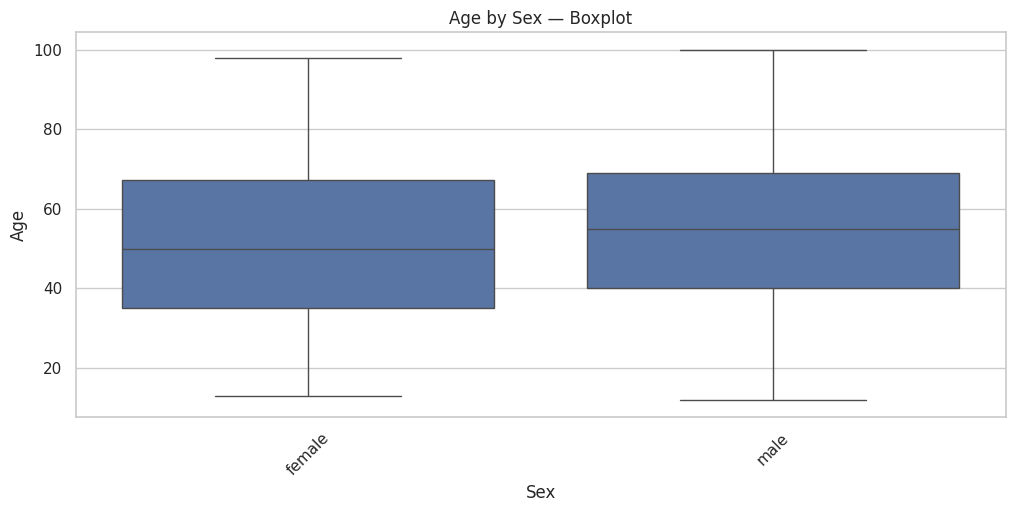

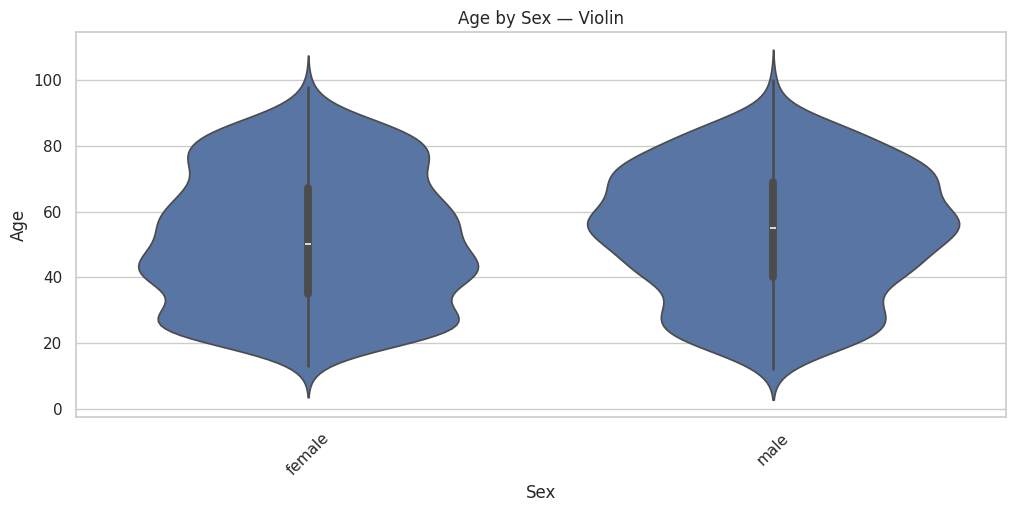

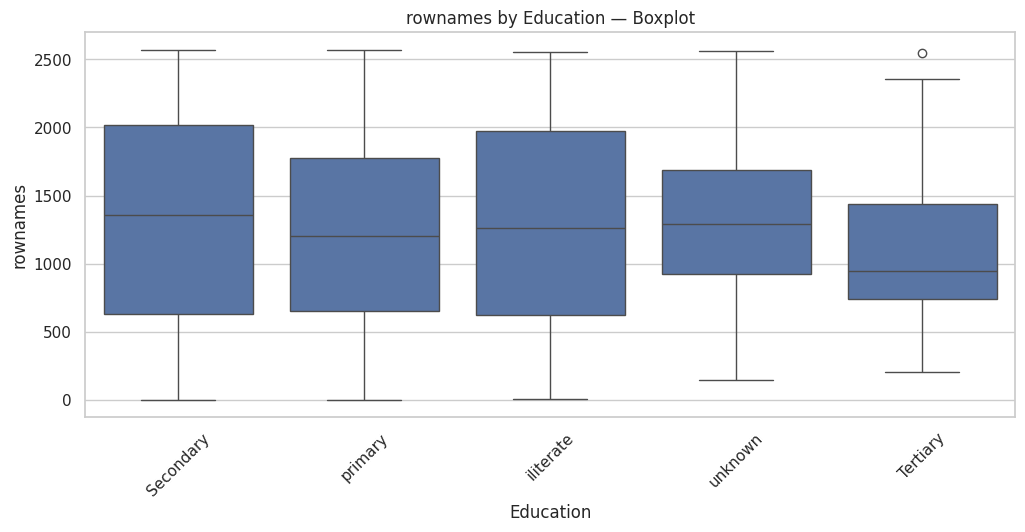

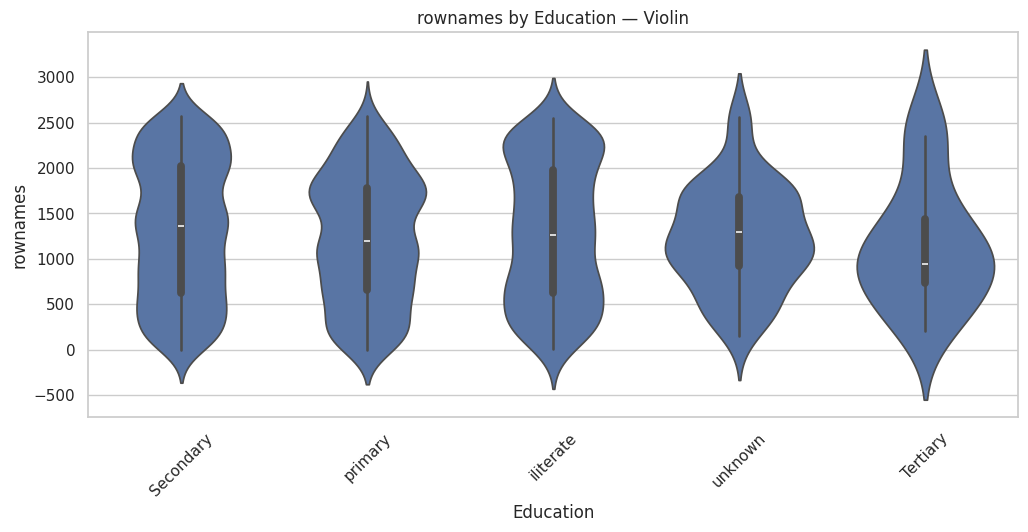

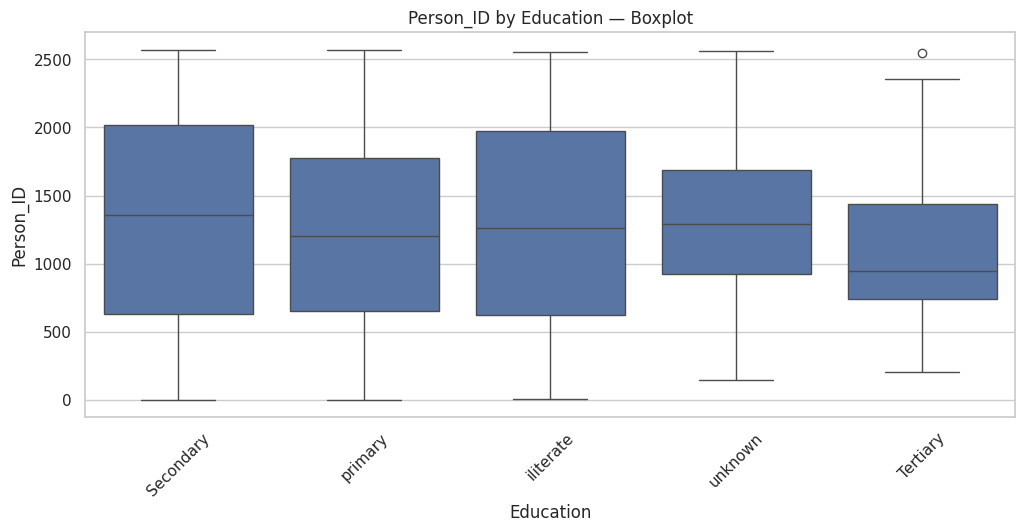

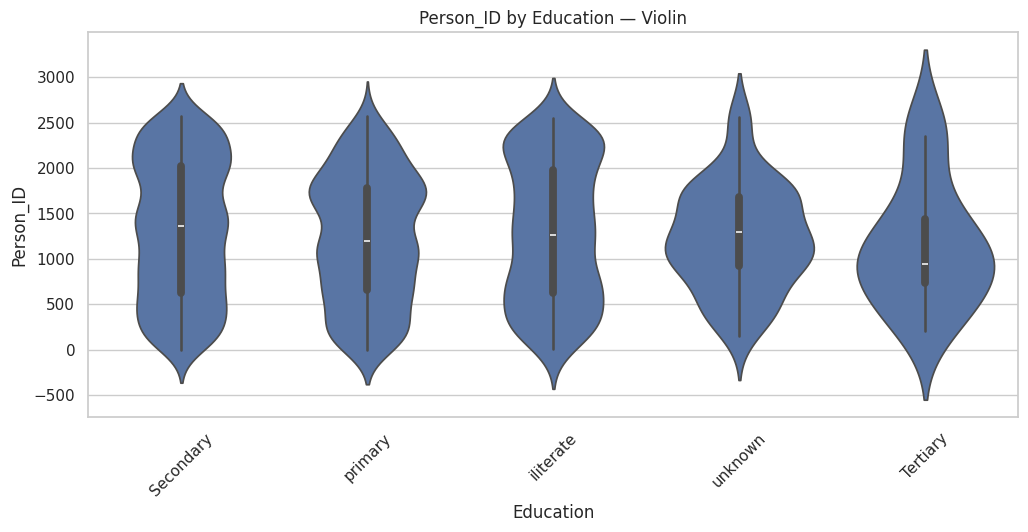

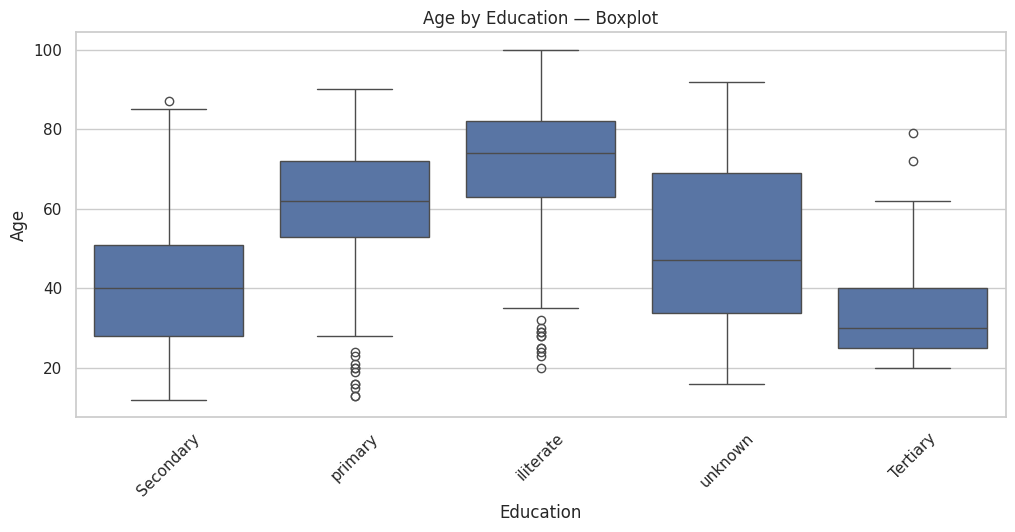

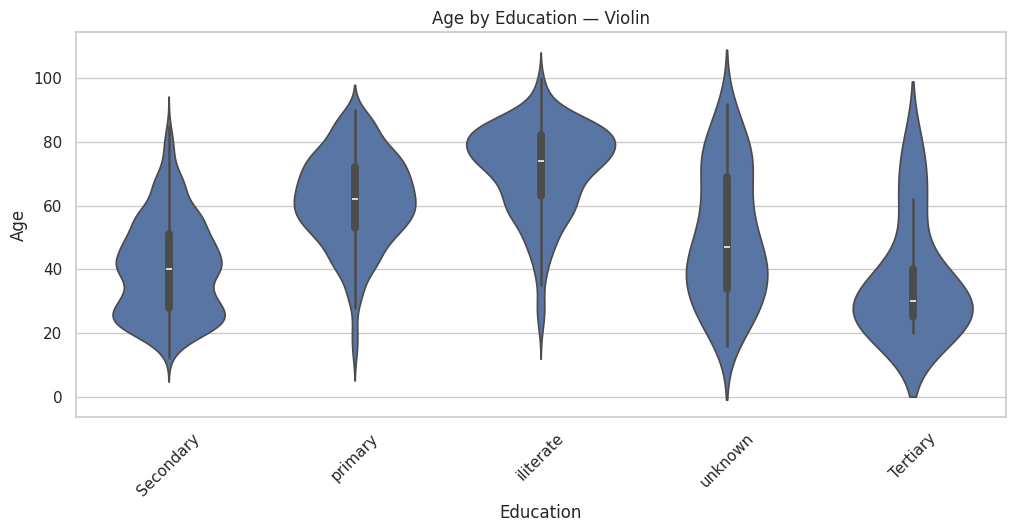

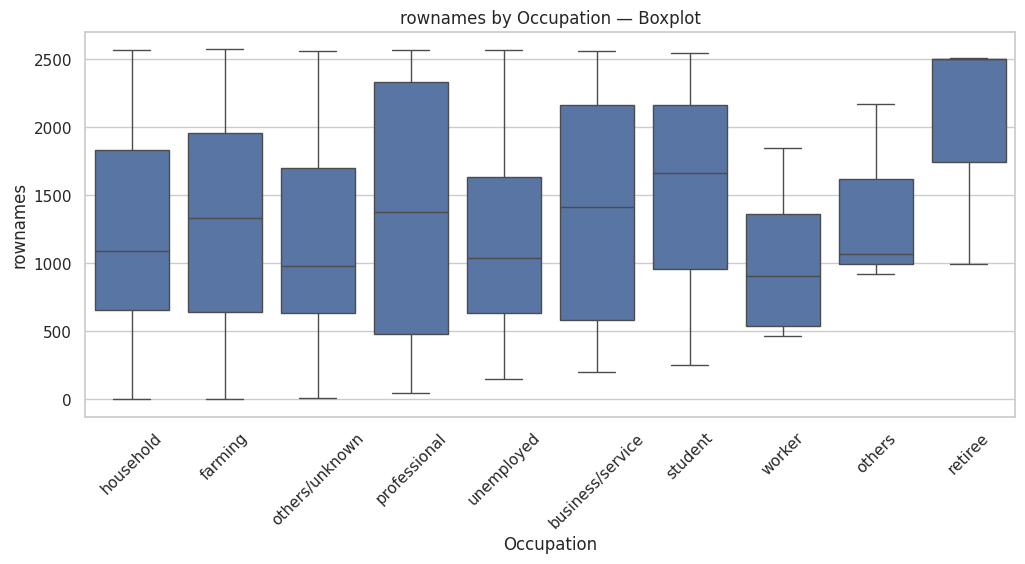

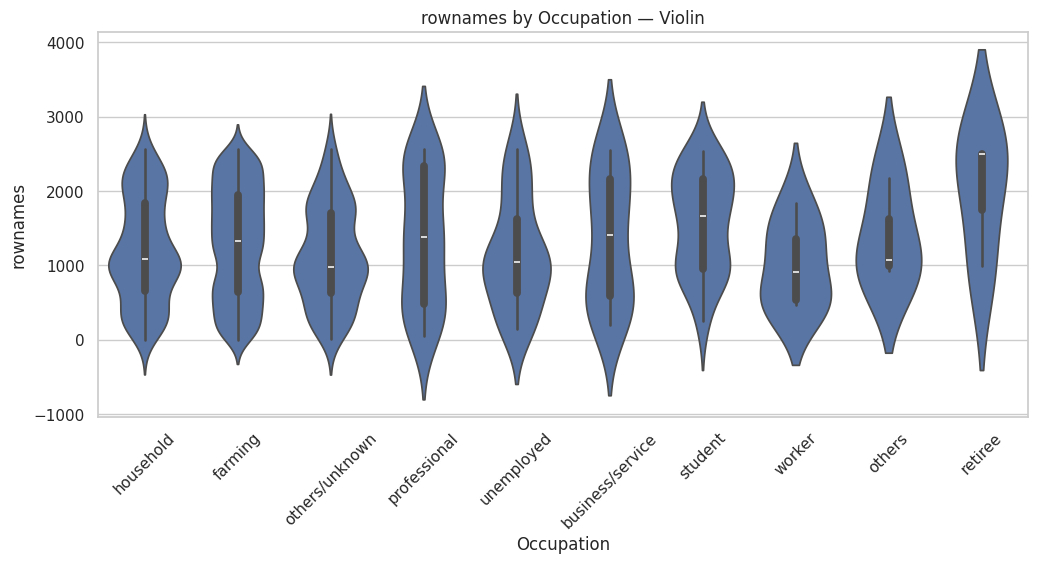

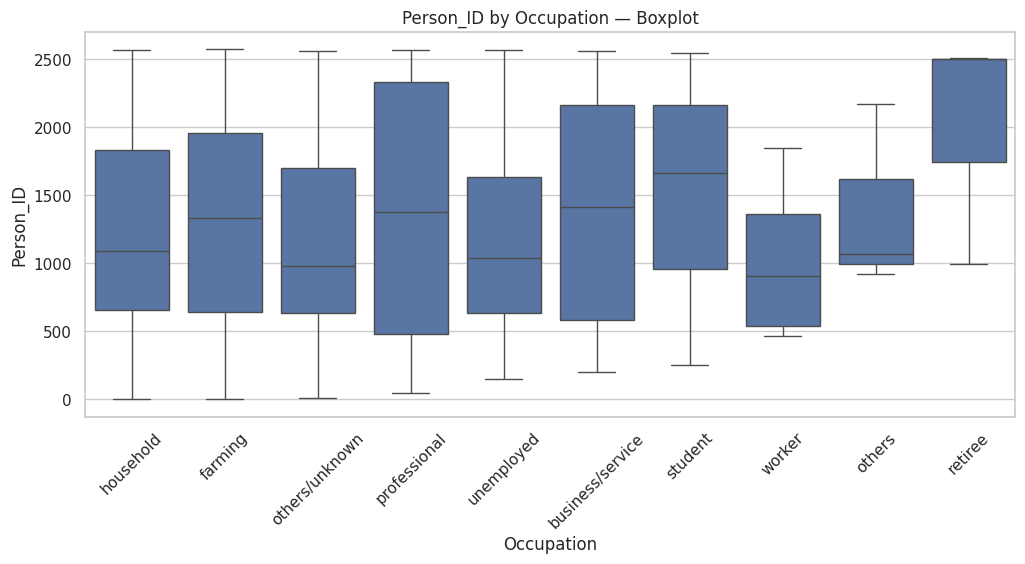

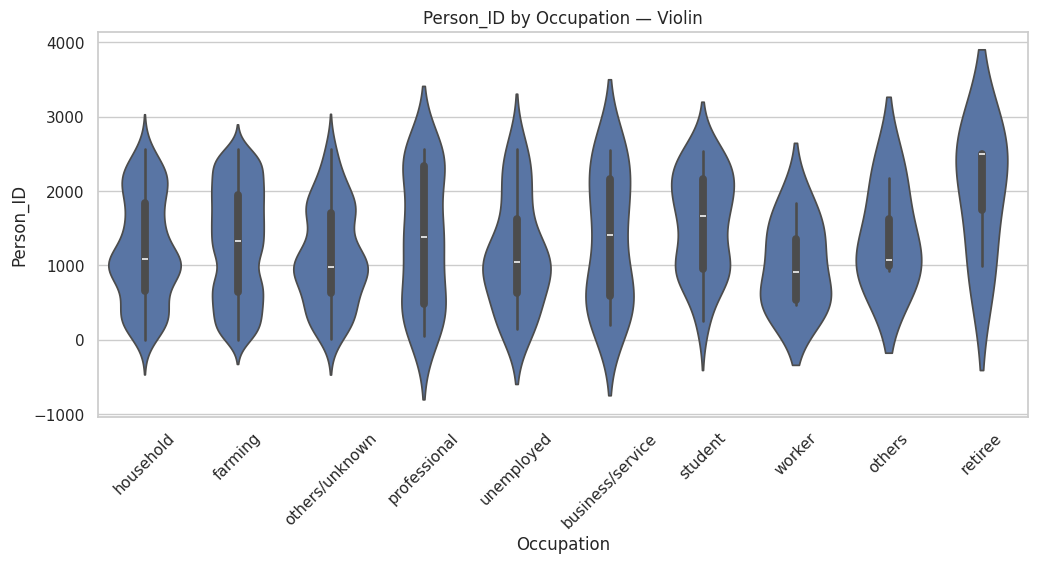

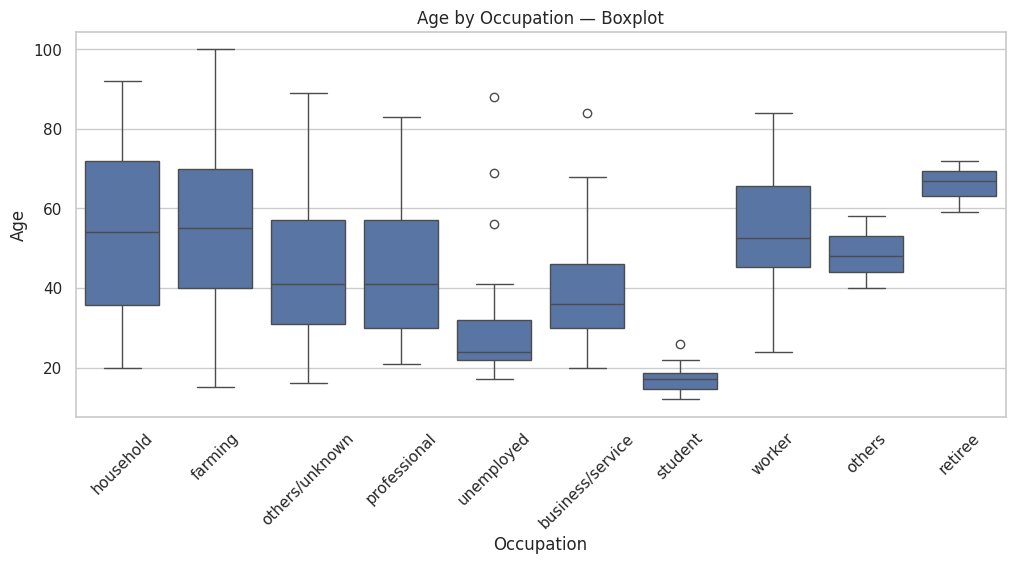

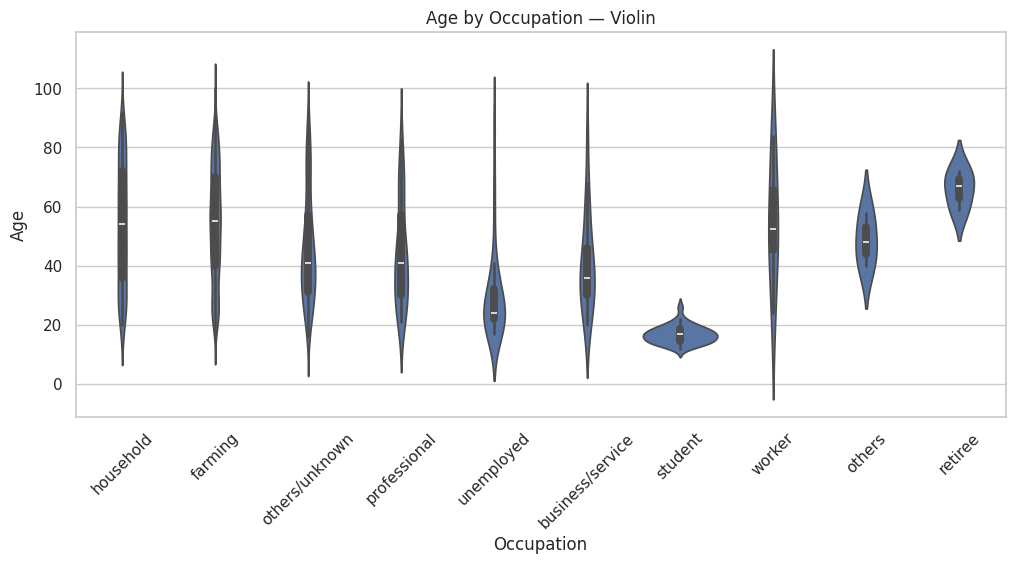

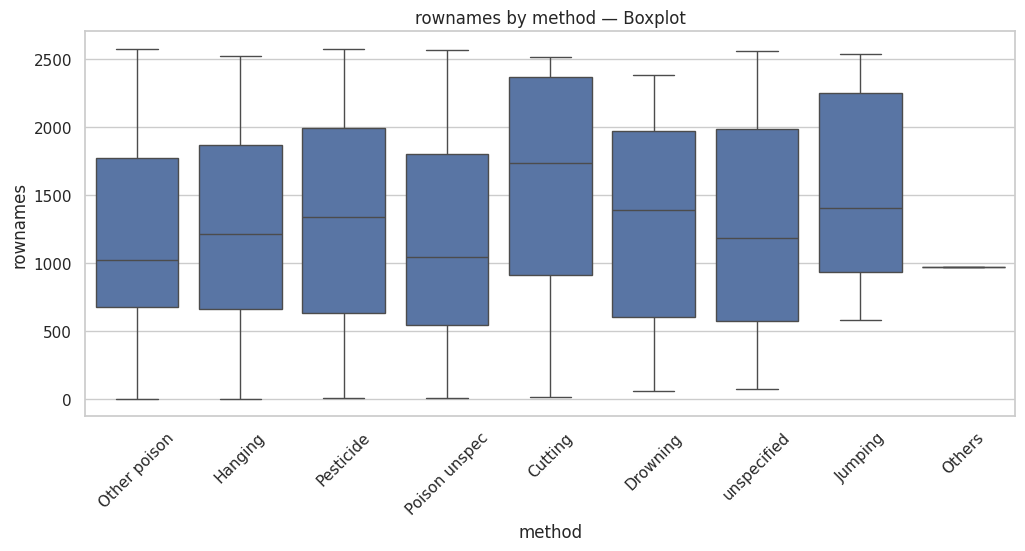

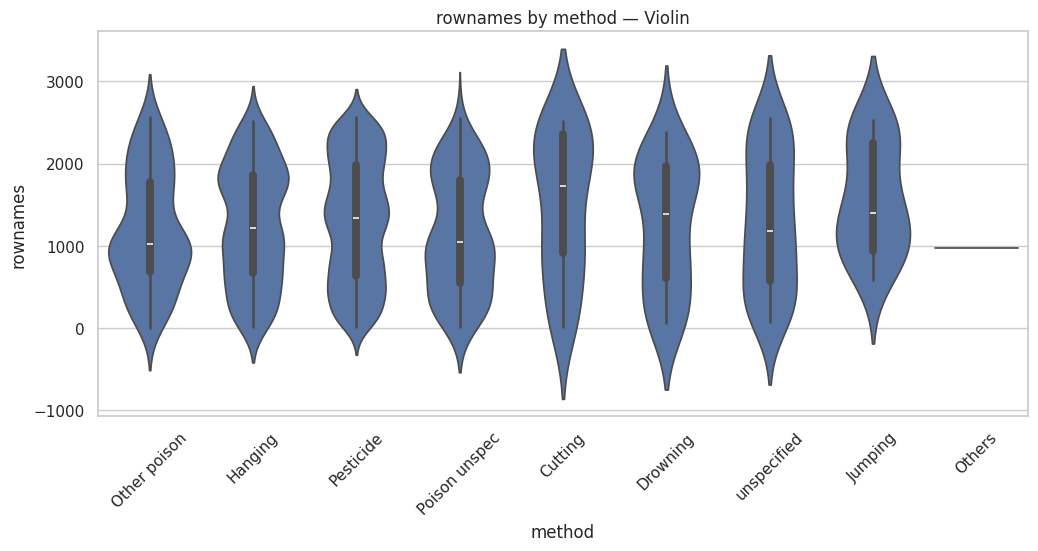

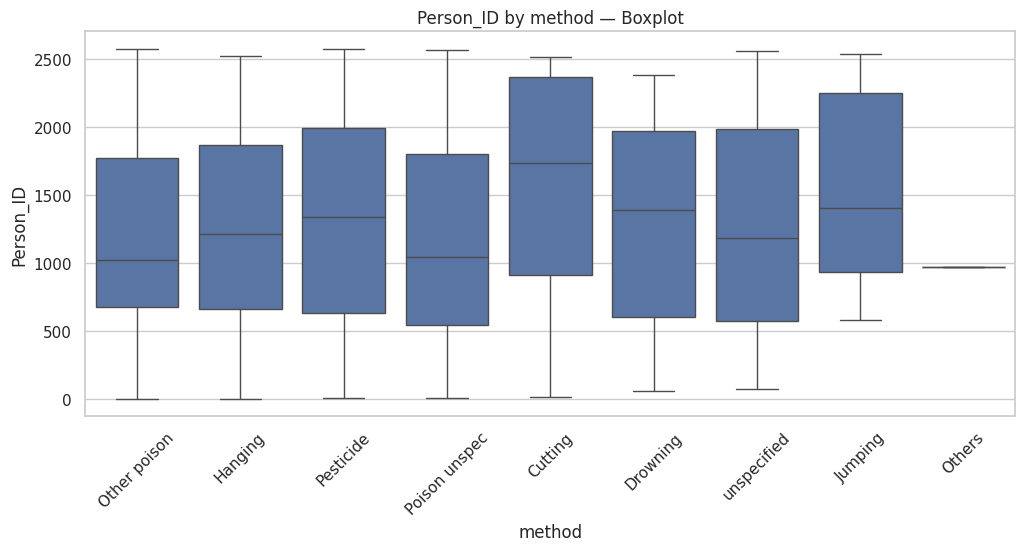

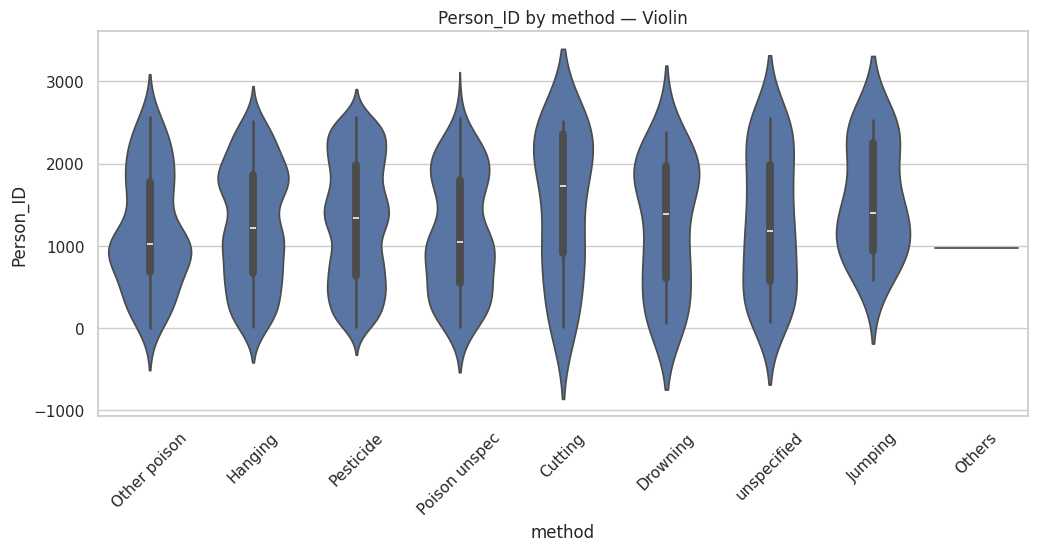

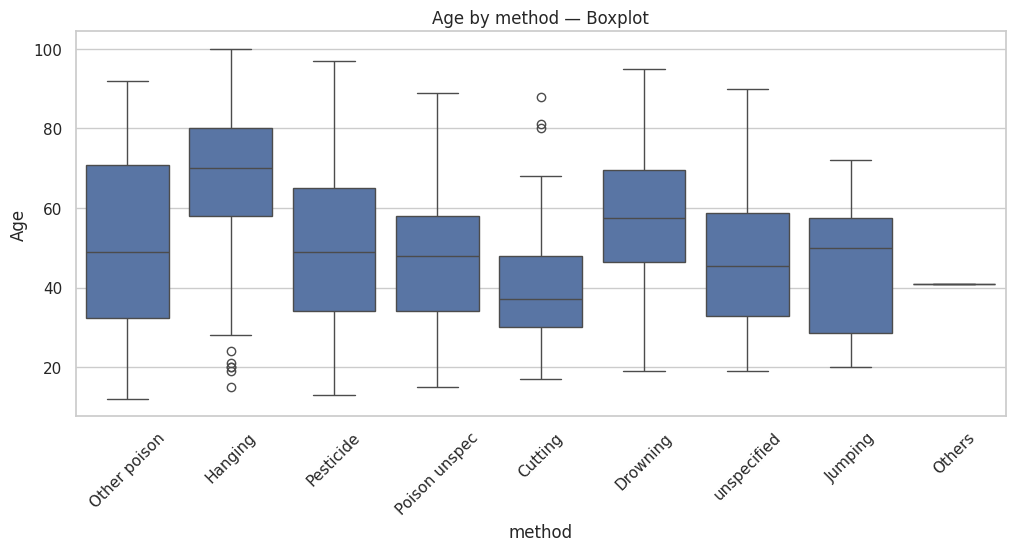

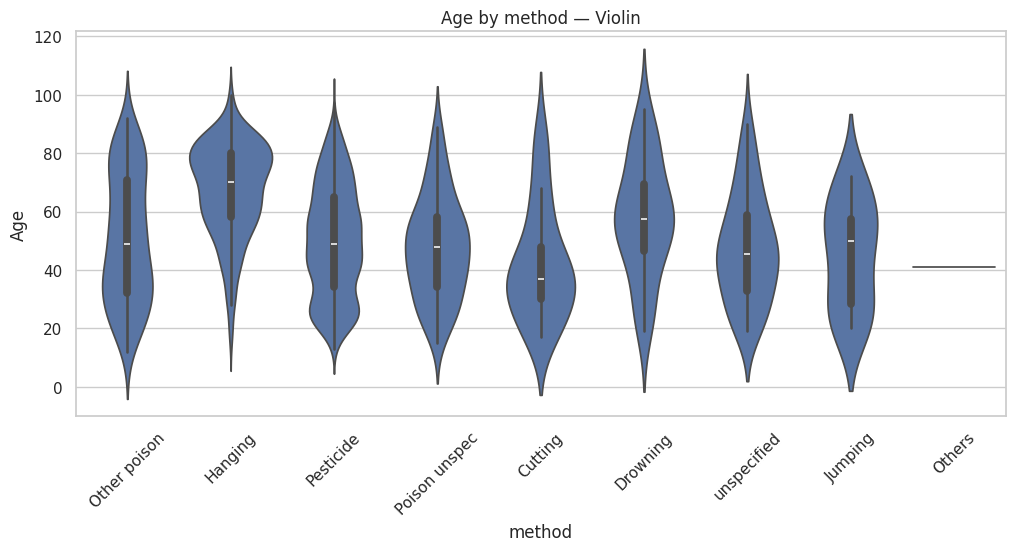

Group stats — rownames by Hospitalised


count         mean  median         std
Hospitalised                                        
yes            1553  1328.933677  1376.0  735.307871
no             1018  1220.502947  1201.0  748.541424

Group stats — Person_ID by Hospitalised


count         mean  median         std
Hospitalised                                        
yes            1553  1328.933677  1376.0  735.307871
no             1018  1220.502947  1201.0  748.541424

Group stats — Year by Hospitalised


count         mean  median       std
Hospitalised                                      
yes            1553  2010.035415  2010.0  0.799908
no             1018  2010.060904  2010.0  0.778411

Group stats — rownames by Died


count         mean  median         std
Died                                        
no     1315  1333.891255  1356.0  744.089380
yes    1256  1235.859076  1244.5  737.448073

Group stats — Person_ID by Died


count         mean  median         std
Died                                        
no     1315  1333.891255  1356.0  744.089380
yes    1256  1235.859076  1244.5  737.448073

Group stats — Year by Died


count         mean  median       std
Died                                      
no     1315  2010.000000  2010.0  0.802394
yes    1256  2010.093153  2010.0  0.777216

Group stats — rownames by Urban


count         mean  median         std
Urban                                          
no        2213  1254.358789  1294.0  719.206275
yes        277  1174.725632   929.0  714.207317
unknown     81  2531.000000  2531.0   23.526581

Group stats — Person_ID by Urban


count         mean  median         std
Urban                                          
no        2213  1254.358789  1294.0  719.206275
yes        277  1174.725632   929.0  714.207317
unknown     81  2531.000000  2531.0   23.526581

Group stats — Year by Urban


count         mean  median       std
Urban                                        
no        2213  2010.047899  2010.0  0.796387
yes        277  2010.000000  2010.0  0.770846
unknown     81  2010.135802  2010.0  0.720297

Group stats — rownames by Sex


count         mean  median         std
Sex                                           
female   1328  1289.352410  1295.5  737.980043
male     1243  1282.418343  1268.0  747.226057

Group stats — Person_ID by Sex


count         mean  median         std
Sex                                           
female   1328  1289.352410  1295.5  737.980043
male     1243  1282.418343  1268.0  747.226057

Group stats — Year by Sex


count         mean  median       std
Sex                                         
female   1328  2010.037651  2010.0  0.798509
male     1243  2010.053902  2010.0  0.783993

Group stats — rownames by Education


count         mean  median         std
Education                                        
Secondary   1280  1318.621094  1357.5  761.594821
primary      659  1220.517451  1200.0  699.802960
iliterate    533  1300.840525  1263.0  766.509739
unknown       80  1235.100000  1294.5  577.595947
Tertiary      19  1157.578947   947.0  681.381466

Group stats — Person_ID by Education


count         mean  median         std
Education                                        
Secondary   1280  1318.621094  1357.5  761.594821
primary      659  1220.517451  1200.0  699.802960
iliterate    533  1300.840525  1263.0  766.509739
unknown       80  1235.100000  1294.5  577.595947
Tertiary      19  1157.578947   947.0  681.381466

Group stats — Year by Education


count         mean  median       std
Education                                      
Secondary   1280  2010.059375  2010.0  0.811126
primary      659  2010.037936  2010.0  0.767948
iliterate    533  2010.024390  2010.0  0.811898
unknown       80  2009.925000  2010.0  0.382364
Tertiary      19  2010.473684  2011.0  0.841191

Group stats — rownames by Occupation


count         mean  median         std
Occupation                                              
farming            2032  1301.305118  1335.5  748.986311
household           248  1212.350806  1088.0  702.373346
others/unknown      156  1136.141026   979.5  655.000334
professional         37  1343.162162  1377.0  873.685124
student              35  1575.057143  1666.0  670.120004
unemployed           30  1159.366667  1040.0  731.258598
business/service     21  1349.285714  1412.0  871.312868
worker                6  1008.333333   905.5  574.477386
others                3  1388.000000  1069.0  682.877002
retiree               3  1999.666667  2499.0  871.808083

Group stats — Person_ID by Occupation


count         mean  median         std
Occupation                                              
farming            2032  1301.305118  1335.5  748.986311
household           248  1212.350806  1088.0  702.373346
others/unknown      156  1136.141026   979.5  655.000334
professional         37  1343.162162  1377.0  873.685124
student              35  1575.057143  1666.0  670.120004
unemployed           30  1159.366667  1040.0  731.258598
business/service     21  1349.285714  1412.0  871.312868
worker                6  1008.333333   905.5  574.477386
others                3  1388.000000  1069.0  682.877002
retiree               3  1999.666667  2499.0  871.808083

Group stats — Year by Occupation


count         mean  median       std
Occupation                                            
farming            2032  2010.020669  2010.0  0.793602
household           248  2010.153226  2010.0  0.810302
others/unknown      156  2010.128205  2010.0  0.688317
professional         37  2010.324324  2011.0  0.783654
student              35  2010.142857  2010.0  0.845154
unemployed           30  2010.200000  2010.0  0.805156
business/service     21  2009.857143  2010.0  0.792825
worker                6  2010.333333  2010.0  0.516398
others                3  2009.000000  2009.0  0.000000
retiree               3  2009.333333  2009.0  0.577350

Group stats — rownames by method


count         mean  median         std
method                                               
Pesticide       1768  1306.429299  1339.5  748.323401
Hanging          431  1249.883991  1211.0  715.909683
Other poison     146  1197.239726  1021.0  703.459592
Poison unspec    107  1133.981308  1040.0  704.953136
unspecified       48  1298.270833  1180.0  828.156932
Cutting           29  1472.724138  1730.0  864.981209
Drowning          26  1241.461538  1384.5  781.273331
Jumping           15  1562.200000  1403.0  665.624218
Others             1   969.000000   969.0         NaN

Group stats — Person_ID by method


count         mean  median         std
method                                               
Pesticide       1768  1306.429299  1339.5  748.323401
Hanging          431  1249.883991  1211.0  715.909683
Other poison     146  1197.239726  1021.0  703.459592
Poison unspec    107  1133.981308  1040.0  704.953136
unspecified       48  1298.270833  1180.0  828.156932
Cutting           29  1472.724138  1730.0  864.981209
Drowning          26  1241.461538  1384.5  781.273331
Jumping           15  1562.200000  1403.0  665.624218
Others             1   969.000000   969.0         NaN

Group stats — Year by method


count         mean  median       std
method                                             
Pesticide       1768  2010.004525  2010.0  0.791138
Hanging          431  2010.118329  2010.0  0.739210
Other poison     146  2009.684932  2010.0  0.740488
Poison unspec    107  2010.794393  2011.0  0.470614
unspecified       48  2010.645833  2011.0  0.668106
Cutting           29  2009.620690  2010.0  0.676852
Drowning          26  2010.038462  2010.0  0.773603
Jumping           15  2009.866667  2010.0  0.833809
Others             1  2010.000000  2010.0       NaN

In [53]:
# For each categorical column, visualize distribution of numeric cols
for cat in cat_cols:
    # pick top 3 numeric columns by variance
    top_nums = df[numeric_cols].var().sort_values(ascending=False).index[:3].tolist()
    for num in top_nums:
        plt.figure(figsize=(12,5))
        sns.boxplot(x=cat, y=num, data=df)
        plt.xticks(rotation=45)
        plt.title(f"{num} by {cat} — Boxplot")
        plt.show()

        plt.figure(figsize=(12,5))
        sns.violinplot(x=cat, y=num, data=df)
        plt.xticks(rotation=45)
        plt.title(f"{num} by {cat} — Violin")
        plt.show()

# Group statistics
for cat in cat_cols:
    for num in numeric_cols[:3]:
        print(f"Group stats — {num} by {cat}")
        display(df.groupby(cat)[num].agg(['count','mean','median','std']).sort_values('count', ascending=False).head(20))

- Categorical vs Categorical: contingency & chi-square

Contingency table: Hospitalised x Died


Died            no   yes
Hospitalised            
no               0  1018
yes           1315   238

Chi-square p-value: 0.0000


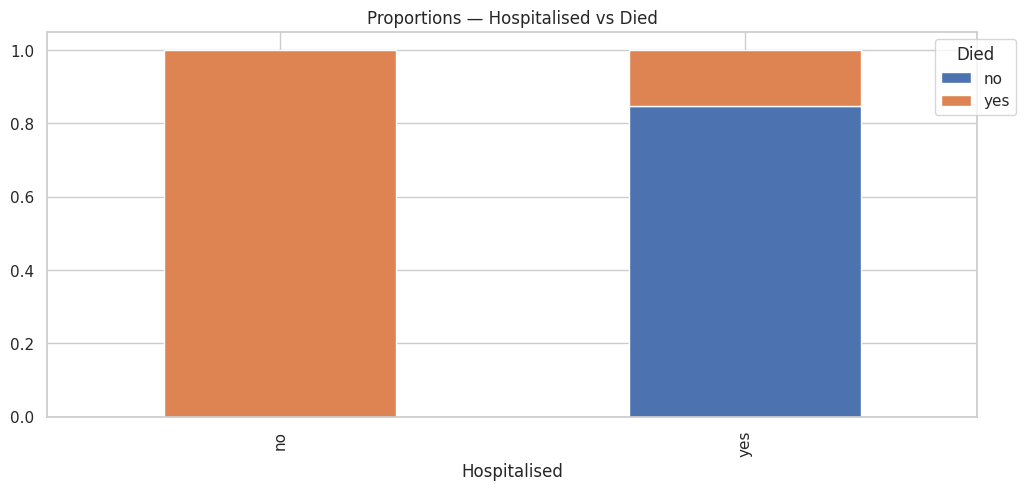

Contingency table: Hospitalised x Urban


Urban           no  unknown  yes
Hospitalised                    
no             938        2   78
yes           1275       79  199

Chi-square p-value: 0.0000


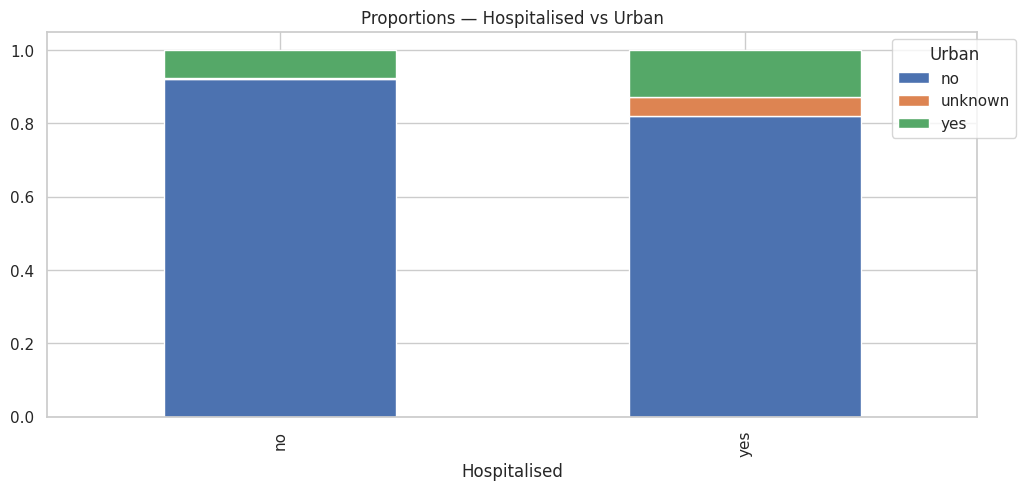

Contingency table: Hospitalised x Sex


Sex           female  male
Hospitalised              
no               469   549
yes              859   694

Chi-square p-value: 0.0000


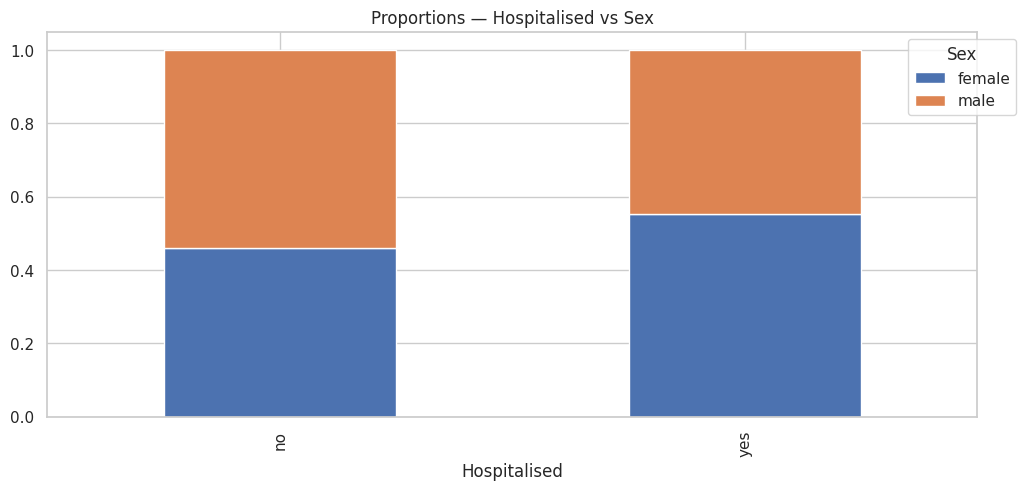

Contingency table: Died x Urban


Urban    no  unknown  yes
Died                     
no     1072       79  164
yes    1141        2  113

Chi-square p-value: 0.0000


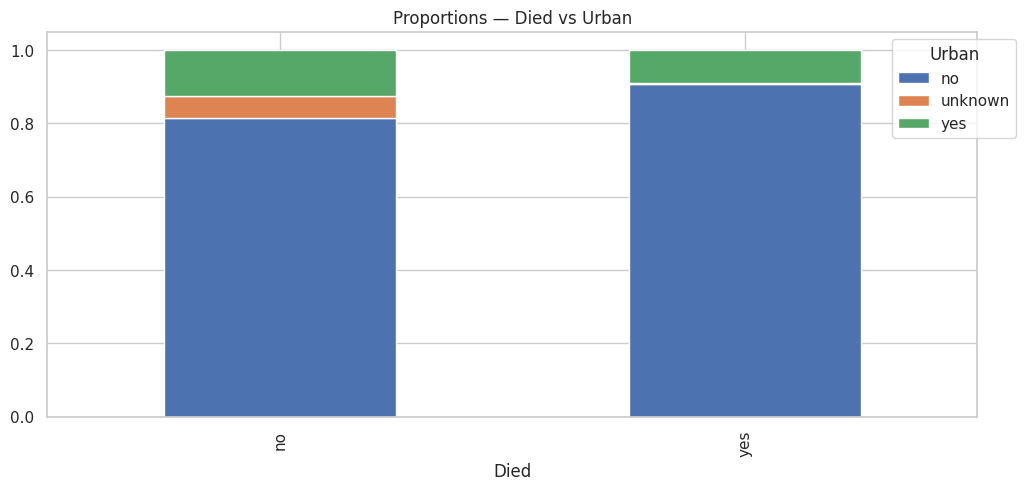

Contingency table: Died x Sex


Sex   female  male
Died              
no       741   574
yes      587   669

Chi-square p-value: 0.0000


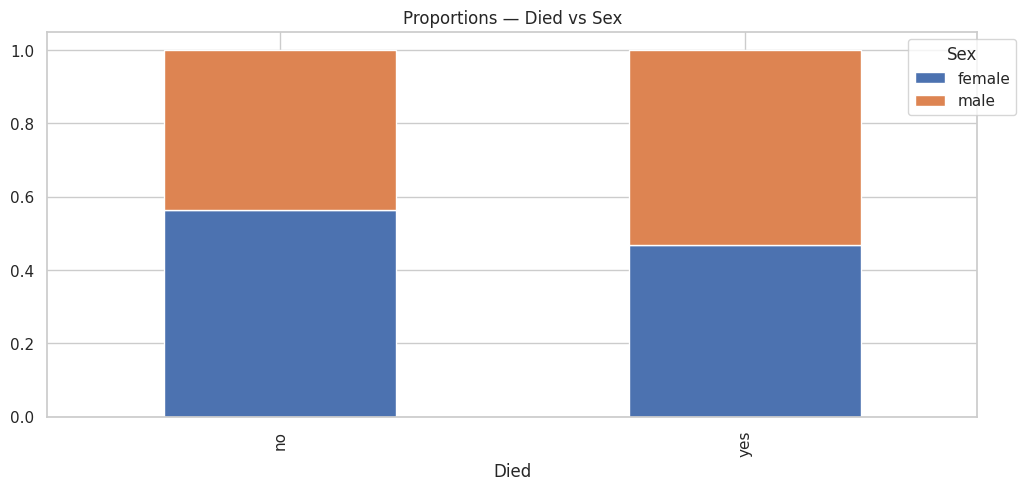

Contingency table: Died x Education


Education  Secondary  Tertiary  iliterate  primary  unknown
Died                                                       
no               966         9         80      191       69
yes              314        10        453      468       11

Chi-square p-value: 0.0000


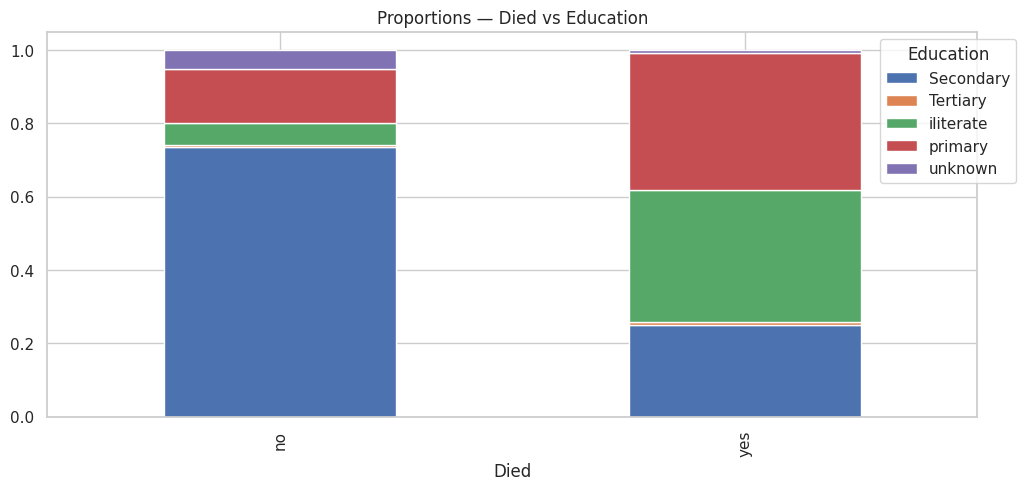

Contingency table: Urban x Sex


Sex      female  male
Urban                
no         1134  1079
unknown      45    36
yes         149   128

Chi-square p-value: 0.5627


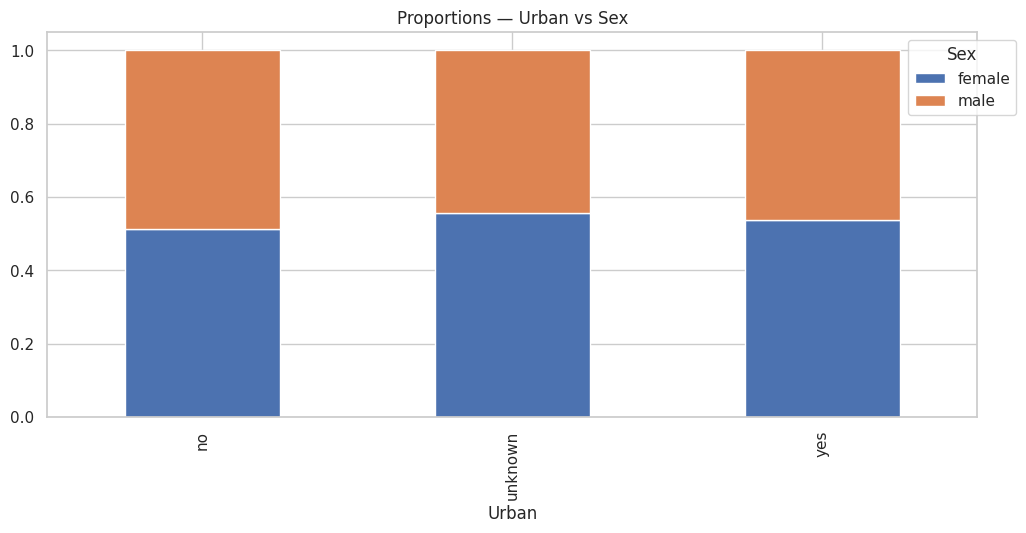

Contingency table: Urban x Education


Education  Secondary  Tertiary  iliterate  primary  unknown
Urban                                                      
no              1054         8        496      606       49
unknown           64         1          5        7        4
yes              162        10         32       46       27

Chi-square p-value: 0.0000


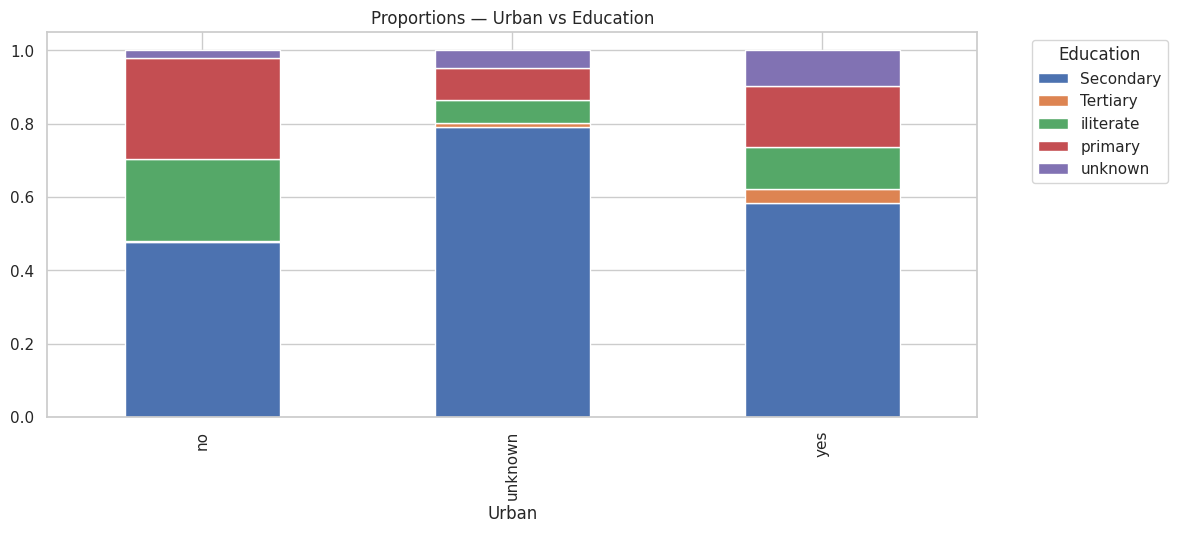

Contingency table: Urban x Occupation


Occupation  business/service  farming  household  others  others/unknown  \
Urban                                                                      
no                         9     1813        215       2             104   
unknown                    4       57          5       0               5   
yes                        8      162         28       1              47   

Occupation  professional  retiree  student  unemployed  worker  
Urban                                                           
no                    22        1       22          20       5  
unknown                4        2        2           2       0  
yes                   11        0       11           8       1

Chi-square p-value: 0.0000


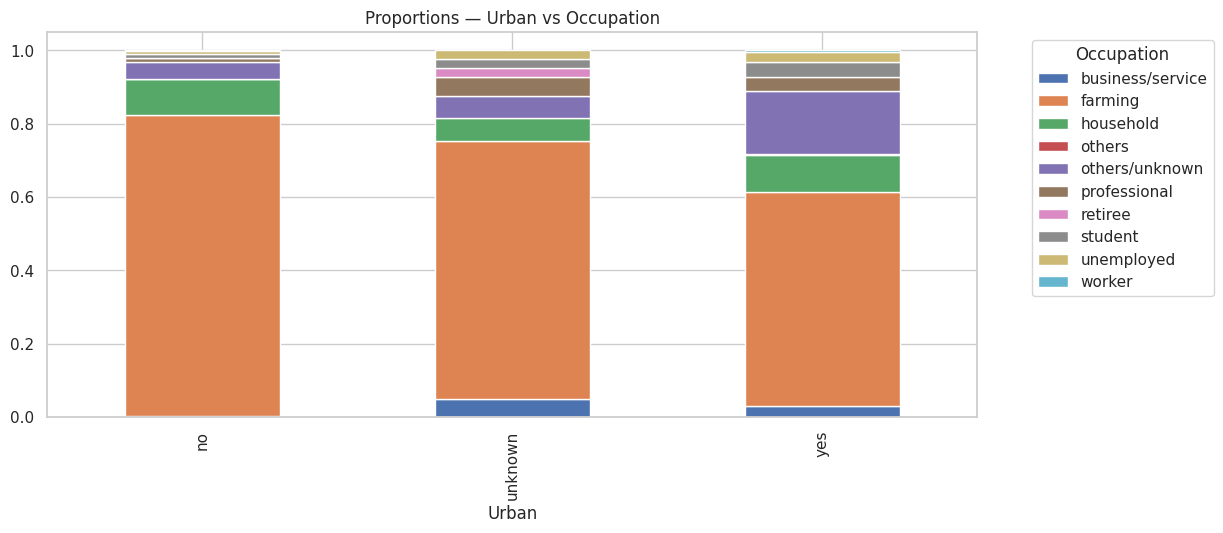

In [54]:
from scipy.stats import chi2_contingency

for i in range(min(3, len(cat_cols))):
    for j in range(i+1, min(i+4, len(cat_cols))):
        c1 = cat_cols[i]; c2 = cat_cols[j]
        ct = pd.crosstab(df[c1], df[c2])
        print(f"Contingency table: {c1} x {c2}")
        display(ct)
        # Chi-square test (if table not too sparse)
        if ct.size > 1 and ct.values.sum() > 20:
            chi2, p, dof, ex = chi2_contingency(ct)
            print(f"Chi-square p-value: {p:.4f}")
        # Proportional stacked bar
        ct_prop = ct.div(ct.sum(axis=1), axis=0)
        ct_prop.plot(kind='bar', stacked=True, figsize=(12,5))
        plt.title(f"Proportions — {c1} vs {c2}")
        plt.legend(title=c2, bbox_to_anchor=(1.05,1))
        plt.show()

**5.** 3D Analysis

- 3D scatter (auto pick top 3 numeric features by variance)

3D scatter features: ['rownames', 'Person_ID', 'Age']


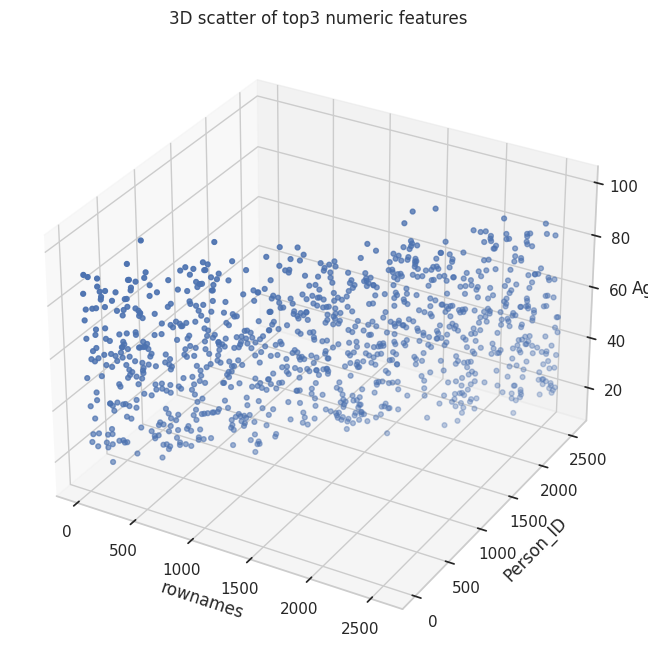

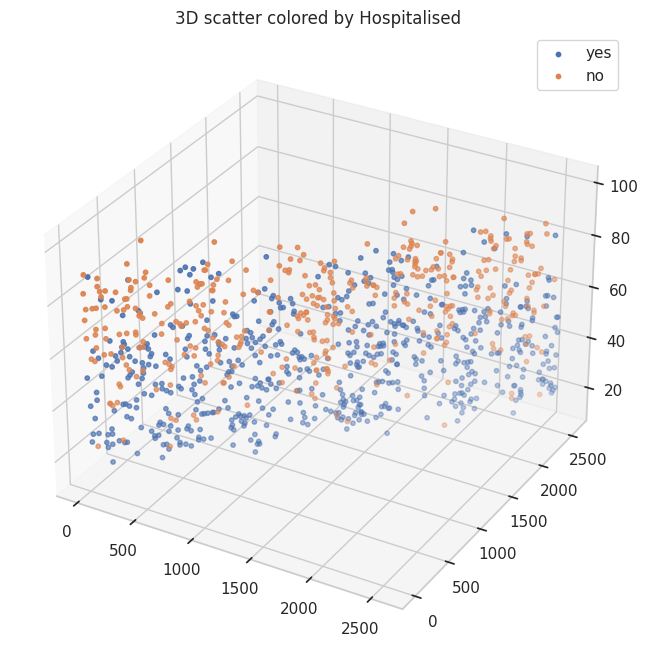

In [55]:
if len(numeric_cols) >= 3:
    top3 = df[numeric_cols].var().sort_values(ascending=False).index[:3].tolist()
    print("3D scatter features:", top3)
    sample = df[top3].dropna().sample(n=min(1000, len(df.dropna())), random_state=1)
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(sample[top3[0]], sample[top3[1]], sample[top3[2]], s=12)
    ax.set_xlabel(top3[0]); ax.set_ylabel(top3[1]); ax.set_zlabel(top3[2])
    plt.title("3D scatter of top3 numeric features")
    plt.show()

# Alternative: 3D colored by a categorical (if exists)
if len(cat_cols)>0 and len(numeric_cols)>=3:
    cat = cat_cols[0]
    sample = df[top3 + [cat]].dropna().sample(n=min(1000, len(df)), random_state=1)
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    unique_cats = sample[cat].unique()
    for u in unique_cats[:8]:  # limit to 8 categories for clarity
        s = sample[sample[cat]==u]
        ax.scatter(s[top3[0]], s[top3[1]], s[top3[2]], label=str(u), s=10)
    ax.legend(loc='upper right')
    plt.title(f"3D scatter colored by {cat}")
    plt.show()

**6.** Time Series Analysis (auto-detection of date/year)

- Detect year/date-like column and plot trends

Detected date/year column: Year
Time series target: rownames


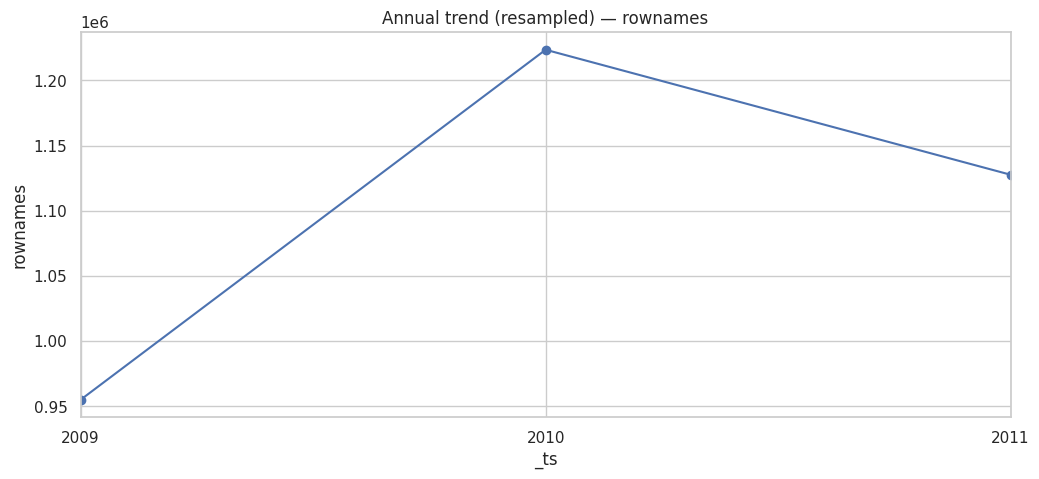

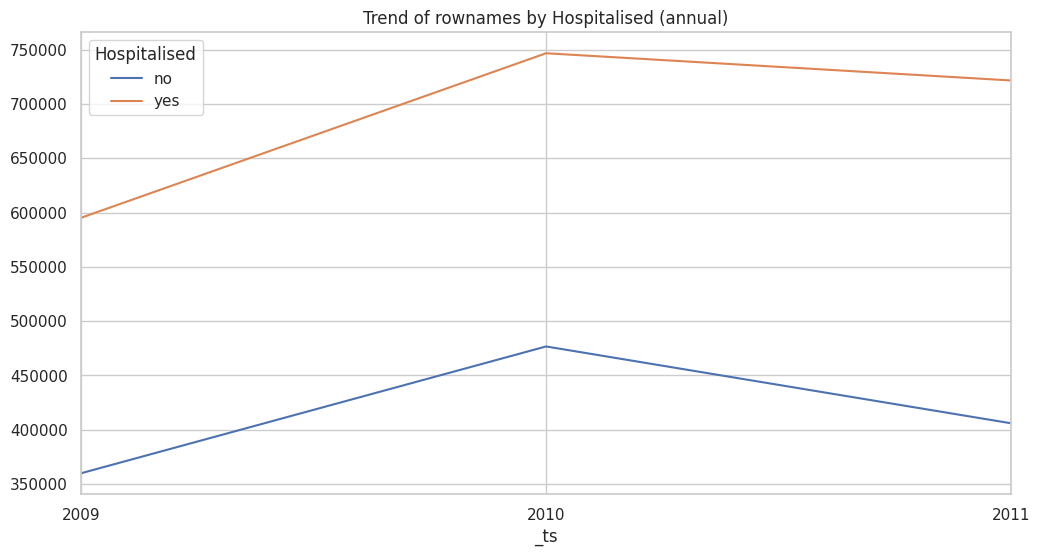

In [56]:
# Attempt to find a date/year-like column
date_col = None
for c in df.columns:
    if c.lower() in ['year','date','time','year_id','yr']:
        date_col = c
        break

# If no candidate, try to find integer column with values between 1900-2100 (likely year)
if date_col is None:
    for c in df.columns:
        if pd.api.types.is_integer_dtype(df[c]) or pd.api.types.is_float_dtype(df[c]):
            vals = df[c].dropna().unique()
            if len(vals) > 0 and np.all((vals >= 1900) & (vals <= 2100)):
                date_col = c
                break

if date_col:
    print("Detected date/year column:", date_col)
    # Create a datetime index (try different parse strategies)
    try:
        df['_ts'] = pd.to_datetime(df[date_col], errors='coerce', format='%Y')
    except:
        df['_ts'] = pd.to_datetime(df[date_col], errors='coerce')

    df_ts = df.set_index('_ts').sort_index()
    # Pick target numeric (prefer suicides-like column)
    targets = [c for c in numeric_cols if 'suicide' in c.lower() or 'suicides' in c.lower()]
    target = targets[0] if targets else numeric_cols[0]
    print("Time series target:", target)

    # Annual trend (resample)
    ts = df_ts[target].resample('Y').sum()
    plt.figure(figsize=(12,5))
    ts.plot(marker='o')
    plt.title(f"Annual trend (resampled) — {target}")
    plt.ylabel(target)
    plt.show()

    # Rolling mean + trend decomposition if enough points
    if len(ts.dropna()) >= 8:
        ts_log = np.log1p(ts)
        rolling = ts_log.rolling(window=3, center=False).mean()
        plt.figure(figsize=(12,5))
        ts_log.plot(label='log(target)')
        rolling.plot(label='rolling mean (3)')
        plt.legend()
        plt.title("Log-transform + rolling mean")
        plt.show()

    # Group by another categorical (if exists)
    if len(cat_cols) > 0:
        cat = cat_cols[0]
        grouped = df_ts.groupby([pd.Grouper(freq='Y'), cat])[target].sum().unstack(fill_value=0)
        if grouped.shape[1] <= 12:
            grouped.plot(figsize=(12,6))
            plt.title(f"Trend of {target} by {cat} (annual)")
            plt.show()
else:
    print("No date/year-like column detected — skip time series. If you want time-series work, add a YYYY or YYYY-MM-DD column.")

**7.** Clustering — KMeans, Agglomerative, GMM (EM) & evaluation

- Feature selection and scaling (clean pipeline)

In [57]:
# Feature selection for clustering: choose numeric columns with few missing values
min_non_null_ratio = 0.6
clust_features = [c for c in numeric_cols if df[c].notna().mean() >= min_non_null_ratio]
# if too many, pick top variance
clust_features = list(df[clust_features].var().sort_values(ascending=False).index[:6])
print("Clustering features:", clust_features)

# Prepare X: drop rows with NA in selected features
X = df[clust_features].dropna().copy()
print("Rows used for clustering:", len(X))

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Clustering features: ['rownames', 'Person_ID', 'Age', 'Month', 'Year']
Rows used for clustering: 2571


- KMeans: elbow + silhouette + choose k + interpret clusters

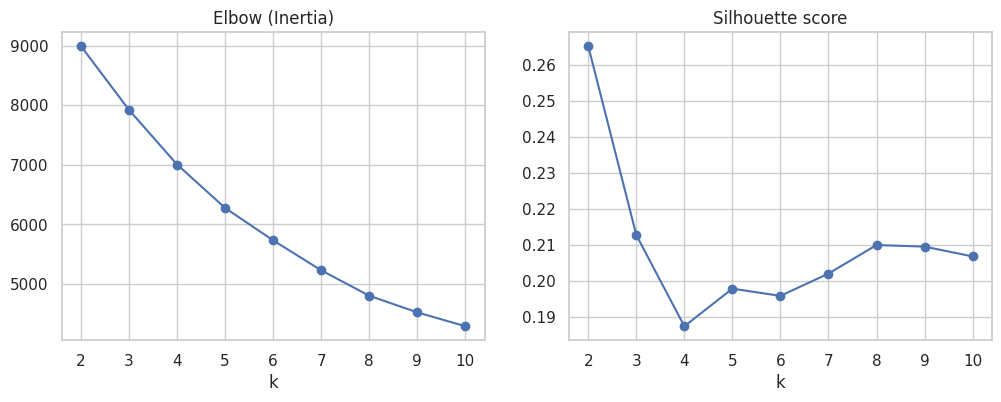

Best k by silhouette: 2


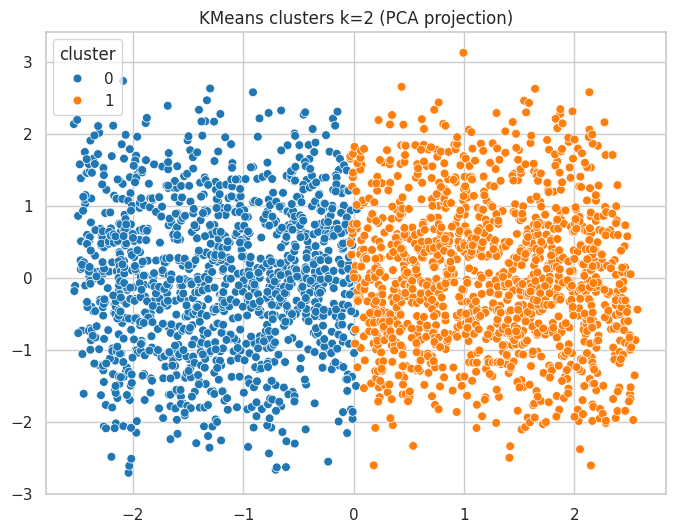

Cluster centers (original scale):


0            1
rownames    644.080031  1929.419782
Person_ID   644.080031  1929.419782
Age          53.325563    51.934579
Month         6.373737     6.222741
Year       2010.019425  2010.071651

In [58]:
# KMeans: elbow + silhouette
inertia = []
sil = []
K = range(2,11)
for k in K:
    km = KMeans(n_clusters=k, random_state=1, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertia.append(km.inertia_)
    sil.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(K, inertia, '-o'); plt.xlabel('k'); plt.title('Elbow (Inertia)')
plt.subplot(1,2,2)
plt.plot(K, sil, '-o'); plt.xlabel('k'); plt.title('Silhouette score')
plt.show()

best_k = K[np.argmax(sil)]
print("Best k by silhouette:", best_k)

# Fit final KMeans
km_final = KMeans(n_clusters=best_k, random_state=1, n_init=20)
labels_km = km_final.fit_predict(X_scaled)
X_km = X.copy()
X_km['cluster_km'] = labels_km

# PCA projection for visualization (2D)
pca = PCA(n_components=2, random_state=1)
proj = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=proj[:,0], y=proj[:,1], hue=labels_km, palette='tab10', s=40)
plt.title(f'KMeans clusters k={best_k} (PCA projection)')
plt.legend(title='cluster')
plt.show()

# Cluster centers (inverse-transform to original scale)
centers = scaler.inverse_transform(km_final.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=clust_features)
print("Cluster centers (original scale):")
display(centers_df.T)

- Agglomerative clustering + dendrogram

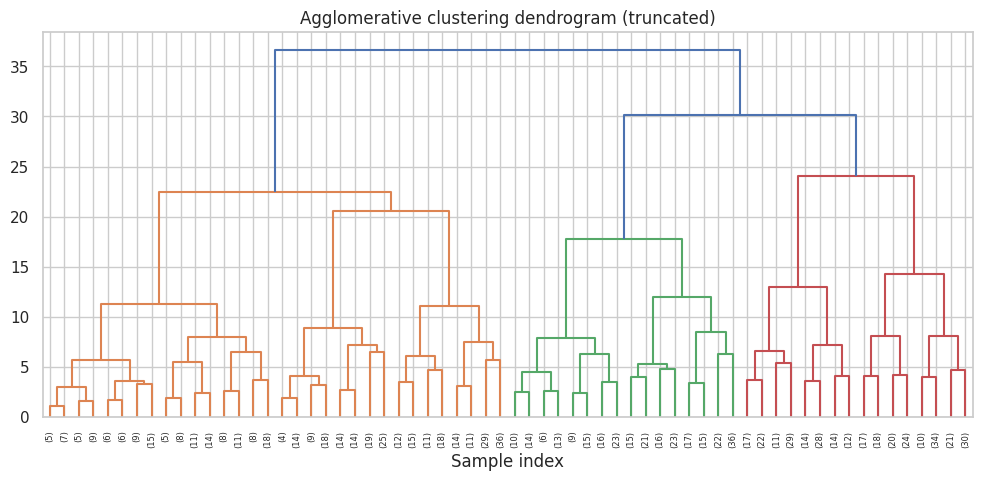

Agglomerative cluster counts: (array([0, 1]), array([1223, 1348]))


In [59]:
# Agglomerative clustering: compute linkage and dendrogram (sample to avoid huge dendrogram)
linkage_matrix = linkage(X_scaled if len(X_scaled) <= 1000 else X_scaled[:1000], method='ward')
plt.figure(figsize=(12,5))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Agglomerative clustering dendrogram (truncated)")
plt.xlabel("Sample index")
plt.show()

# Fit Agglomerative for chosen number of clusters (use best_k or others)
agg = AgglomerativeClustering(n_clusters=best_k, linkage='ward')
labels_agg = agg.fit_predict(X_scaled)
print("Agglomerative cluster counts:", np.unique(labels_agg, return_counts=True))

- Gaussian Mixture Model (EM)

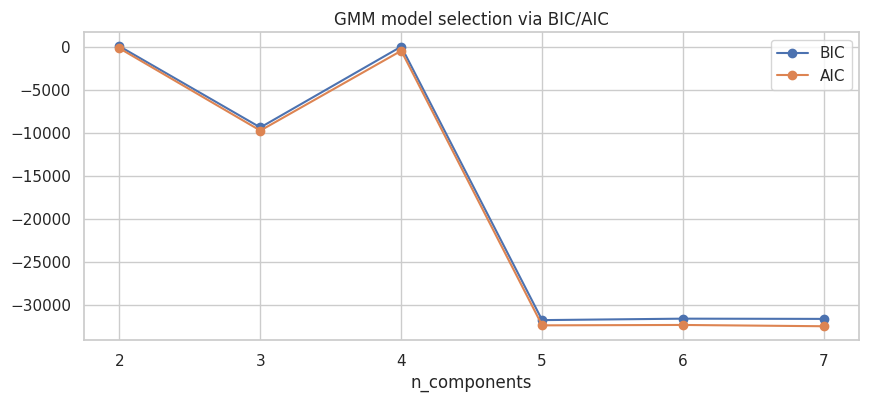

Best GMM components (by BIC): 5
GMM cluster counts: (array([0, 1, 2, 3, 4]), array([560, 749, 146, 956, 160]))


In [60]:
# Gaussian Mixture: try range and choose by BIC/AIC
bics = []
aics = []
g_scores = []
ks = range(2,8)
for k in ks:
    gmm = GaussianMixture(n_components=k, random_state=1, n_init=3)
    gmm.fit(X_scaled)
    bics.append(gmm.bic(X_scaled))
    aics.append(gmm.aic(X_scaled))

plt.figure(figsize=(10,4))
plt.plot(ks, bics, '-o', label='BIC')
plt.plot(ks, aics, '-o', label='AIC')
plt.xlabel('n_components')
plt.legend()
plt.title('GMM model selection via BIC/AIC')
plt.show()

best_g = ks[np.argmin(bics)]
print("Best GMM components (by BIC):", best_g)

gmm = GaussianMixture(n_components=best_g, random_state=1, n_init=5)
labels_gmm = gmm.fit_predict(X_scaled)
print("GMM cluster counts:", np.unique(labels_gmm, return_counts=True))

**8.** Outlier Detection — IQR, LOF, DBSCAN

- IQR outlier flag for numeric columns

In [61]:
# IQR rule to flag rows that are outliers in 1+ columns
outlier_flags = pd.Series(False, index=df.index)
for c in numeric_cols:
    s = df[c].dropna()
    q1 = s.quantile(0.25); q3 = s.quantile(0.75); iqr = q3-q1
    lower = q1 - 1.5*iqr; upper = q3 + 1.5*iqr
    mask = (df[c] < lower) | (df[c] > upper)
    outlier_flags = outlier_flags | mask

print("Rows flagged as outlier by 1.5*IQR in any numeric column:", outlier_flags.sum())
# show some outliers
display(df[outlier_flags].head())

Rows flagged as outlier by 1.5*IQR in any numeric column: 0


Empty DataFrame
Columns: [rownames, Person_ID, Hospitalised, Died, Urban, Year, Month, Sex, Age, Education, Occupation, method, _ts]
Index: []

- LOF (Local Outlier Factor) and DBSCAN

In [62]:
# Apply LOF on scaled clustering features (if enough rows)
if len(X_scaled) >= 20:
    lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02)  # tuning
    lof_labels = lof.fit_predict(X_scaled)
    # LOF: -1 -> outlier, 1 -> inlier
    outlier_by_lof = (lof_labels == -1)
    print("LOF outliers count:", outlier_by_lof.sum())
    # attach back
    X_loc = X.copy()
    X_loc['lof_outlier'] = outlier_by_lof
    display(X_loc[X_loc['lof_outlier']].head())

# DBSCAN for density-based anomalies
db = DBSCAN(eps=0.5, min_samples=5)
db_labels = db.fit_predict(X_scaled)
n_noise = list(db_labels).count(-1)
print("DBSCAN noise points:", n_noise)

LOF outliers count: 52


rownames  Person_ID  Age  Month  Year  lof_outlier
6           7          7   90      1  2010         True
9          10         10   30      1  2011         True
69         70         70   21     12  2009         True
83         84         84   26      1  2009         True
103       104        104   29     12  2011         True

DBSCAN noise points: 131


**9.** Cluster Interpretation & Export of cluster labels

- Attach cluster labels to original df and analyze

In [63]:
# Attach KMeans cluster labels to original df (rows used in clustering)
df_clusters = df.copy()
# labels_km correspond to X.index
df_clusters.loc[X.index, 'cluster_km'] = labels_km
df_clusters.loc[X.index, 'cluster_agg'] = labels_agg
df_clusters.loc[X.index, 'cluster_gmm'] = labels_gmm

# Show summary stats for clusters (KMeans)
print("KMeans cluster summary (mean of features):")
display(df_clusters.groupby('cluster_km')[clust_features].mean().T)

# Show counts per cluster
print("KMeans cluster counts:")
display(df_clusters['cluster_km'].value_counts())

# Save cluster summary to csv (optional)
df_clusters.groupby('cluster_km')[clust_features].mean().to_csv('cluster_km_centers.csv')
print("Saved cluster centers to cluster_km_centers.csv in runtime.")

KMeans cluster summary (mean of features):


cluster_km          0.0          1.0
rownames     644.080031  1929.419782
Person_ID    644.080031  1929.419782
Age           53.325563    51.934579
Month          6.373737     6.222741
Year        2010.019425  2010.071651

KMeans cluster counts:


cluster_km
0.0    1287
1.0    1284
Name: count, dtype: int64

Saved cluster centers to cluster_km_centers.csv in runtime.


## Phase 3

**1.** Importing required packages

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis, TruncatedSVD
from sklearn.manifold import TSNE, MDS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.covariance import EmpiricalCovariance
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)
sns.set(style='whitegrid')

**2.** Prepare numeric matrix for dimensionality reduction

- Standardize numeric features.
- Keep only columns with sufficient non-null values.

In [65]:
# Identify numeric columns and prepare feature matrix
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# require at least 60% non-null to include in analysis
min_non_null_ratio = 0.6
use_cols = [c for c in numeric_cols if df[c].notna().mean() >= min_non_null_ratio]
print("Numeric columns chosen for DR:", use_cols)

# If too many columns, keep top by variance (limit to 20)
if len(use_cols) > 20:
    use_cols = list(df[use_cols].var().sort_values(ascending=False).index[:20])
    print("Trimmed to top variance columns:", use_cols)

X = df[use_cols].dropna().copy()
print("Rows used for DR:", X.shape[0])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Numeric columns chosen for DR: ['rownames', 'Person_ID', 'Year', 'Month', 'Age']
Rows used for DR: 2571


**3.** Principal Component Analysis (PCA)



- Fit PCA, plot explained variance ratio and cumulative variance.
- Show top feature loadings for first few components.
- Visualize 2D and 3D PCA projections (color by existing cluster label if present).

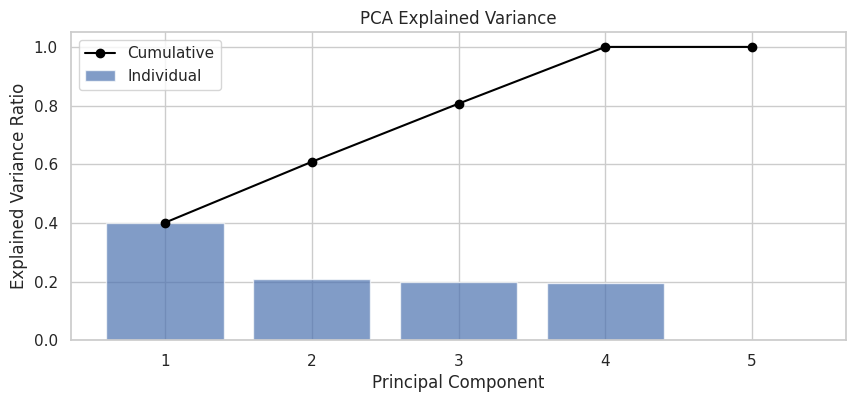

PC1       PC2       PC3       PC4           PC5
rownames   0.705600  0.022567 -0.013414  0.037942  7.071068e-01
Person_ID  0.705600  0.022567 -0.013414  0.037942 -7.071068e-01
Year       0.021322 -0.441877  0.879159  0.177113  1.734723e-18
Month     -0.022758 -0.627411 -0.443635  0.639551 -3.469447e-18
Age       -0.057316  0.640376  0.172936  0.746141 -1.040834e-17

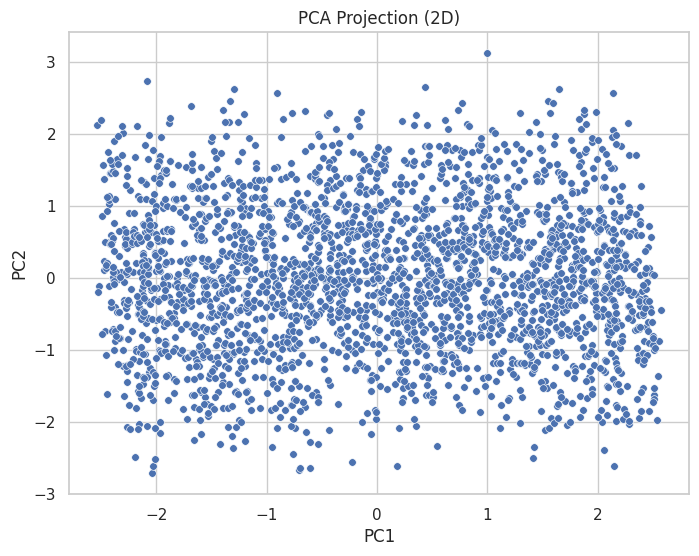

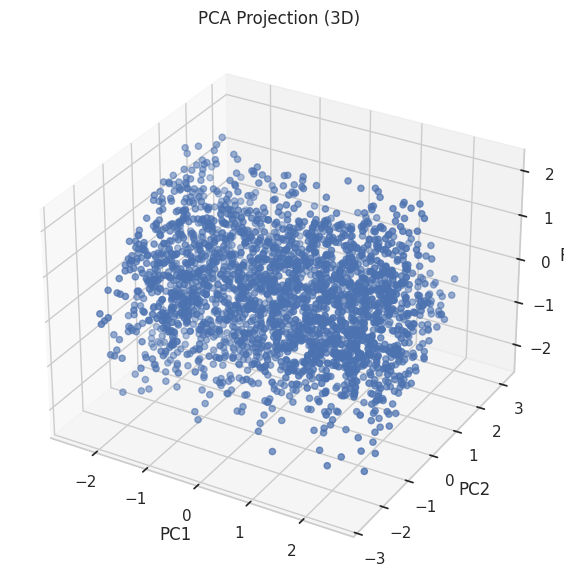

In [67]:
# PCA: fit and explained variance
pca = PCA(n_components=min( min(10, X_scaled.shape[1]), X_scaled.shape[1] ), random_state=1)
pca.fit(X_scaled)
explained = pca.explained_variance_ratio_
cum_explained = np.cumsum(explained)

# Plot explained variance
plt.figure(figsize=(10,4))
plt.bar(range(1,len(explained)+1), explained, alpha=0.7, label='Individual')
plt.plot(range(1,len(cum_explained)+1), cum_explained, marker='o', color='black', label='Cumulative')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

# Component loadings (feature contributions)
loadings = pd.DataFrame(pca.components_.T, index=use_cols, columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])])
display(loadings.iloc[:, :5])  # show first 5 PCs' loadings (or fewer if not available)

# Project to 2D
proj2 = pca.transform(X_scaled)[:, :2]
proj_df = pd.DataFrame(proj2, columns=['PC1','PC2'], index=X.index)

# If a cluster label column exists (common name: 'cluster_km' or 'cluster'), use it for hue
hue_col = None
for candidate in ['cluster_km', 'cluster', 'cluster_agg', 'cluster_gmm']:
    if candidate in df.columns:
        hue_col = candidate
        break

plt.figure(figsize=(8,6))
if hue_col is not None:
    merged = proj_df.join(df[hue_col])
    sns.scatterplot(x='PC1', y='PC2', hue=hue_col, data=merged, palette='tab10', s=40)
else:
    sns.scatterplot(x=proj_df['PC1'], y=proj_df['PC2'], s=30)
plt.title('PCA Projection (2D)')
plt.show()

# Optional: 3D PCA scatter if enough components
if X_scaled.shape[0] >= 10 and pca.n_components_ >= 3:
    from mpl_toolkits.mplot3d import Axes3D
    proj3 = pca.transform(X_scaled)[:, :3]
    fig = plt.figure(figsize=(9,7))
    ax = fig.add_subplot(111, projection='3d')
    if hue_col is not None:
        merged3 = pd.DataFrame(proj3, columns=['PC1','PC2','PC3'], index=X.index).join(df[hue_col])
        for lbl in merged3[hue_col].unique():
            s = merged3[merged3[hue_col]==lbl]
            ax.scatter(s['PC1'], s['PC2'], s['PC3'], label=str(lbl), s=20)
        ax.legend()
    else:
        ax.scatter(proj3[:,0], proj3[:,1], proj3[:,2], s=20)
    ax.set_xlabel('PC1'); ax.set_ylabel('PC2'); ax.set_zlabel('PC3')
    plt.title('PCA Projection (3D)')
    plt.show()

**4.** Singular Value Decomposition (SVD)

- Show singular values and connect them conceptually with PCA.

singular_value  variance_explained
0    7.178542e+01        4.008671e-01
1    5.163077e+01        2.073696e-01
2    5.048714e+01        1.982848e-01
3    4.987149e+01        1.934785e-01
4    6.959364e-15        3.767619e-33

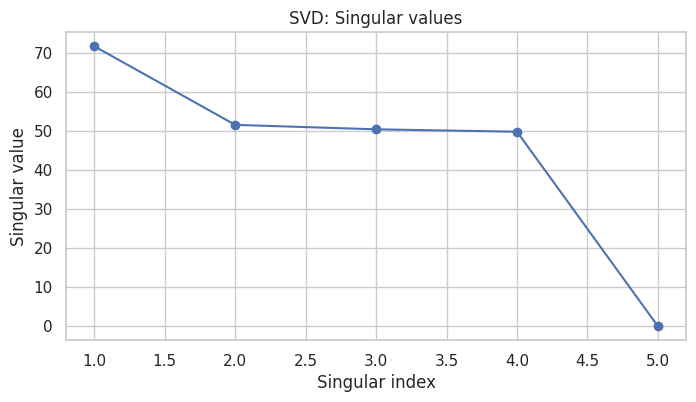

In [68]:
# SVD using numpy (on standardized X)
U, S, VT = np.linalg.svd(X_scaled, full_matrices=False)
# S are singular values
sv_df = pd.DataFrame({'singular_value': S, 'variance_explained': (S**2)/np.sum(S**2)})
display(sv_df.head(10))

plt.figure(figsize=(8,4))
plt.plot(range(1, len(S)+1), S, marker='o')
plt.xlabel('Singular index')
plt.ylabel('Singular value')
plt.title('SVD: Singular values')
plt.grid(True)
plt.show()

**5.** Factor Analysis (FA)

- Fit FactorAnalysis to estimate latent factors and show loadings.
- Use n_components chosen from PCA explained variance (e.g., number of PCs covering ~80% variance) or user-specified.

FactorAnalysis will use n_components = 3


Factor1       Factor2       Factor3
rownames   1.000000  3.182137e-15  1.254787e-15
Person_ID  1.000000  3.182137e-15  1.254787e-15
Year       0.014625 -8.444810e-02 -7.251074e-02
Month     -0.017492 -1.587184e-01  5.196567e-02
Age       -0.040988  1.872796e-01  1.175436e-02

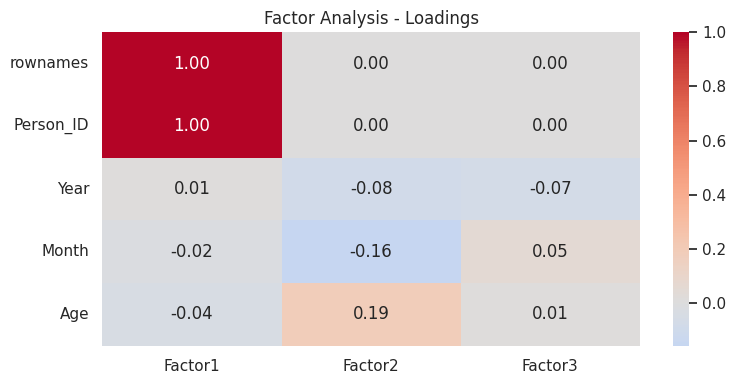

In [69]:
# Decide number of factors: choose smallest k with cum_explained >= 0.80 (or at least 2)
k_factors = np.argmax(cum_explained >= 0.80) + 1 if np.any(cum_explained >= 0.80) else min(3, X_scaled.shape[1])
k_factors = max(2, k_factors)  # at least 2
print("FactorAnalysis will use n_components =", k_factors)

fa = FactorAnalysis(n_components=k_factors, random_state=1)
fa.fit(X_scaled)
# factor loadings shape: (n_features, n_factors)
fa_loadings = pd.DataFrame(fa.components_.T, index=use_cols, columns=[f'Factor{i+1}' for i in range(k_factors)])
display(fa_loadings)

# Heatmap of factor loadings
plt.figure(figsize=(8, max(4, len(use_cols)*0.25)))
sns.heatmap(fa_loadings, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Factor Analysis - Loadings')
plt.tight_layout()
plt.show()

**6.** Non-linear Dimensionality Reduction (t-SNE & MDS)

- Use t-SNE and MDS to inspect non-linear structure. Use sampling for large datasets.

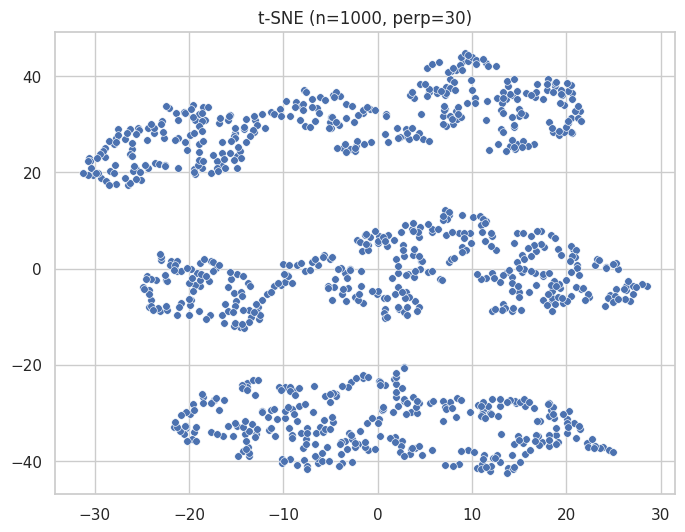

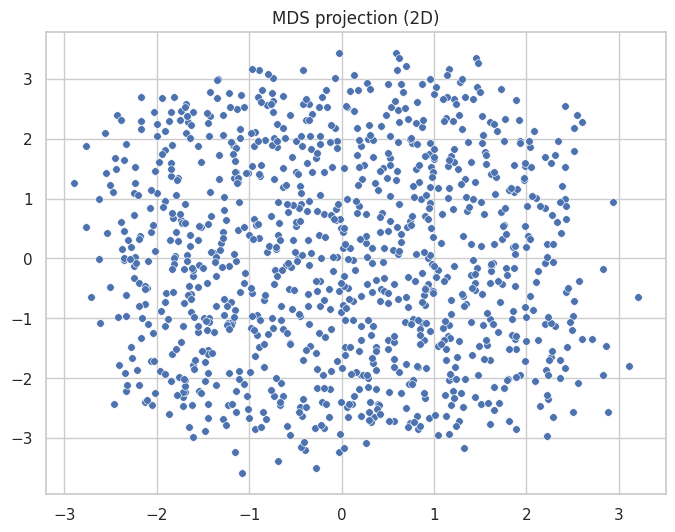

In [70]:
# sample for t-SNE / MDS to keep runtime manageable
n_samples = min(1000, X_scaled.shape[0])
sample_idx = X.index if X_scaled.shape[0] <= n_samples else np.random.choice(X.index, size=n_samples, replace=False)
X_sample = X_scaled[[X.index.get_loc(i) for i in sample_idx]]

# t-SNE (perplexity tuned for sample size)
perp = 30 if n_samples >= 100 else max(5, n_samples//10)
tsne = TSNE(n_components=2, perplexity=perp, random_state=1, init='pca', learning_rate='auto')
tsne_proj = tsne.fit_transform(X_sample)

plt.figure(figsize=(8,6))
if hue_col is not None:
    tsne_df = pd.DataFrame(tsne_proj, columns=['TSNE1','TSNE2'], index=sample_idx).join(df.loc[sample_idx, hue_col])
    sns.scatterplot(x='TSNE1', y='TSNE2', hue=hue_col, data=tsne_df, palette='tab10', s=30)
else:
    sns.scatterplot(x=tsne_proj[:,0], y=tsne_proj[:,1], s=30)
plt.title(f't-SNE (n={n_samples}, perp={perp})')
plt.show()

# MDS
mds = MDS(n_components=2, random_state=1, n_jobs=1)
mds_proj = mds.fit_transform(X_sample)
plt.figure(figsize=(8,6))
if hue_col is not None:
    mds_df = pd.DataFrame(mds_proj, columns=['MDS1','MDS2'], index=sample_idx).join(df.loc[sample_idx, hue_col])
    sns.scatterplot(x='MDS1', y='MDS2', hue=hue_col, data=mds_df, palette='tab10', s=30)
else:
    sns.scatterplot(x=mds_proj[:,0], y=mds_proj[:,1], s=30)
plt.title('MDS projection (2D)')
plt.show()

**7.** Linear Regression Model

- Choose a target. Train/test split, fit LinearRegression, compute R², RMSE, MAE, and plot actual vs predicted and residuals.

In [73]:
# ===== Robust Regression pipeline (safe target selection + preprocessing) =====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (9,6)



Selected regression target: Died
Rows available after dropna for modeling: 2571

Linear Regression results for target 'Died': R² = 0.6506, RMSE = 0.2953, MAE = 0.1821


feature      coef
0                Hospitalised -0.353913
8         Education_iliterate  0.071450
9           Education_primary  0.058935
12       Occupation_household -0.055277
11         Occupation_farming -0.053435
14  Occupation_others/unknown -0.050715
25           method_Pesticide  0.046333
21             method_Hanging  0.045281
1                        Year  0.034679
22             method_Jumping  0.026695
4               Urban_unknown -0.022046
20            method_Drowning  0.017975
5                   Urban_yes  0.017519
17         Occupation_student -0.016558
18      Occupation_unemployed -0.012476
3                         Age  0.011087
6                    Sex_male  0.008736
27         method_unspecified -0.008697
26       method_Poison unspec -0.005807
10          Education_unknown  0.005659
16         Occupation_retiree -0.005158
13          Occupation_others  0.005132
19          Occupation_worker -0.004481
15    Occupation_professional -0.003528
7          Education_Tertiary  0.002033
24              method_Others -0.001165
23        method_Other poison  0.000999
2                       Month -0.000420

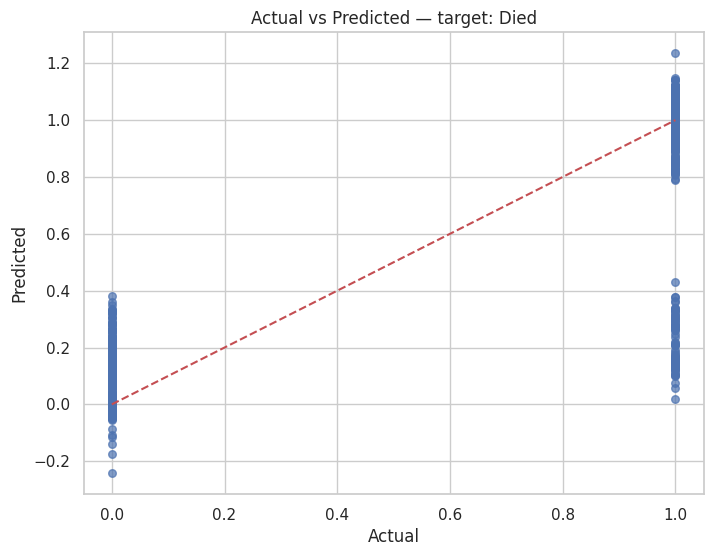

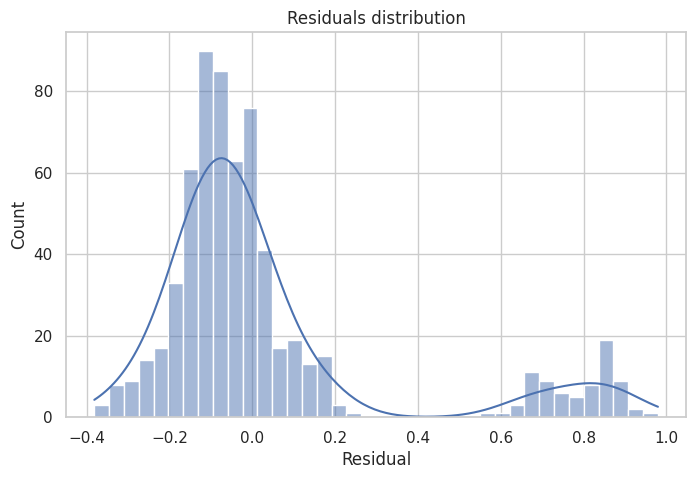

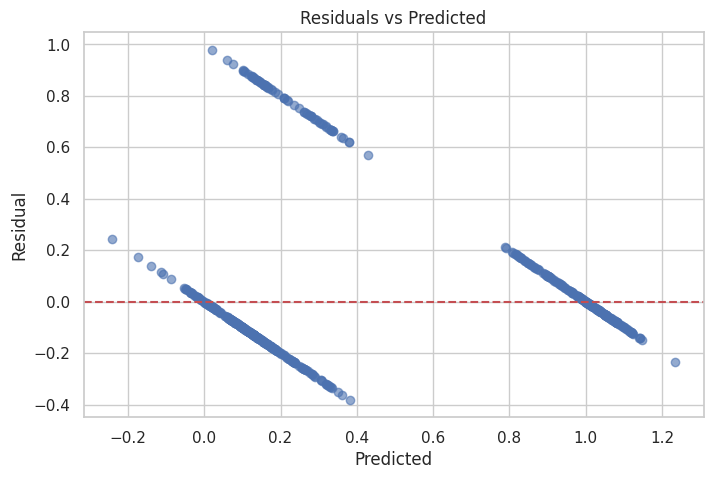


Model training completed — results appear reasonable (no perfect-fit warning).


actual  predicted
0       0   0.122632
1       1   1.013837
2       0   0.006713
3       1   0.963549
4       0  -0.017885
5       1   0.903923
6       0   0.128202
7       0   0.178744
8       1   1.034402
9       0   0.320315

In [74]:
# --- Convert common binary yes/no to 0/1 ---
binary_map = {'yes':1, 'no':0, 'Yes':1, 'No':0, 'YES':1, 'NO':0}
for col in df.columns:
    if df[col].dtype == object:
        unique_vals = df[col].dropna().unique()
        # if only yes/no like values -> map them
        if set([str(x).strip().lower() for x in unique_vals]) <= {'yes','no'}:
            df[col] = df[col].map(lambda x: binary_map.get(x, np.nan))

# --- Smart target selection ---
# Exclude identifier-like columns
id_keywords = ['id','rownam','row','index','person']
numeric_cols_all = df.select_dtypes(include=[np.number]).columns.tolist()
candidates = []

# Prefer explicitly meaningful targets: died, death, suicide, rate
for c in numeric_cols_all:
    lower = c.lower()
    if any(k in lower for k in ['suicide','died','death','fatal','rate']):
        if not any(k in lower for k in id_keywords):
            candidates.append(c)

# If none, prefer 'Age' (common), else pick first numeric non-id
if not candidates:
    if any(c.lower() == 'age' for c in numeric_cols_all):
        candidates = ['Age']
    else:
        numeric_non_id = [c for c in numeric_cols_all if not any(k in c.lower() for k in id_keywords)]
        candidates = numeric_non_id

if not candidates:
    raise ValueError("No suitable numeric candidate for target found. Inspect dataframe columns.")

TARGET = candidates[0]
print("\nSelected regression target:", TARGET)

# Warn if chosen target looks like an id (defensive)
if any(k in TARGET.lower() for k in id_keywords):
    print("WARNING: selected target name contains id-like token -- change TARGET manually to real outcome.")

# --- Prepare features ---
# Start with numeric columns and also encode categorical columns (one-hot)
# Exclude id-like columns and the TARGET
exclude_cols = [c for c in df.columns if any(k in c.lower() for k in id_keywords)]
exclude_cols = list(set(exclude_cols + [TARGET]))

# Build feature frame:
# numeric features (non-target, non-id)
num_feats = [c for c in df.select_dtypes(include=[np.number]).columns if c not in exclude_cols]

# categorical (object) features to one-hot (drop NA for now)
cat_feats = [c for c in df.select_dtypes(include=['object','category']).columns if c not in exclude_cols]

# Convert categorical to dummies (if any)
df_model = df[num_feats + cat_feats + [TARGET]].copy()

# If any categorical, get dummies
if len(cat_feats) > 0:
    df_model = pd.get_dummies(df_model, columns=cat_feats, drop_first=True)

# Drop rows with missing values in model frame
df_model = df_model.dropna()
print("Rows available after dropna for modeling:", df_model.shape[0])

# Prepare X and y
X = df_model.drop(columns=[TARGET])
y = df_model[TARGET].values

# Defensive: if X has zero columns, abort
if X.shape[1] == 0:
    raise ValueError("No predictor features available after excluding id/target. Check columns.")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Fit Linear Regression
model = LinearRegression()
model.fit(X_train_s, y_train)
y_pred = model.predict(X_test_s)

# Metrics (RMSE computed compatibly)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"\nLinear Regression results for target '{TARGET}': R² = {r2:.4f}, RMSE = {rmse:.4f}, MAE = {mae:.4f}")

# Show top coefficients by absolute value
feature_names = X.columns.tolist()
coef = model.coef_
coef_df = pd.DataFrame({'feature': feature_names, 'coef': coef})
coef_df['abs_coef'] = coef_df['coef'].abs()
coef_df = coef_df.sort_values('abs_coef', ascending=False).drop(columns='abs_coef')
display(coef_df.head(30))

# ---- Diagnostic plots ----
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, s=30)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted — target: {TARGET}')
plt.grid(True)
plt.show()

# Residuals
resid = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(resid, kde=True)
plt.title('Residuals distribution')
plt.xlabel('Residual')
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(y_pred, resid, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residuals vs Predicted')
plt.show()

# Defensive check: warn if perfect fit (likely target was an index/ID)
if np.isclose(rmse, 0.0, atol=1e-9) and np.isclose(mae, 0.0, atol=1e-9) and r2 > 0.9999:
    print("\nWARNING: Model shows near-perfect fit (R² ~ 1). This usually indicates the chosen target is an identifier\n"
          "or there is perfect linear dependence/leakage. Re-check 'TARGET' and identifier columns to avoid predicting IDs.")
else:
    print("\nModel training completed — results appear reasonable (no perfect-fit warning).")

# Print small sample of predictions vs actual
comp_df = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
display(comp_df.head(10))

**8.** Model Improvement

Improving regression model for target: Died
Rows and numeric features for modeling: (2571, 5)

Top selected features based on mutual information (K=5):
['Hospitalised', 'Year', 'Month', 'Age', '_ts']


Model        R2      RMSE       MAE
1         Ridge (L2)  0.641935  0.298967  0.166118
0  Linear Regression  0.641900  0.298981  0.166047
2         Lasso (L1)  0.638477  0.300406  0.174042


Ridge (L2) CV R² mean = 0.6954, std = 0.0548


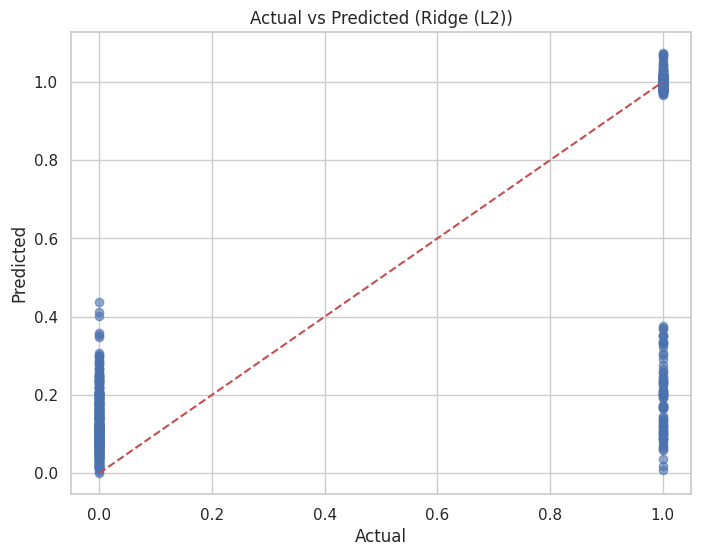


Top contributing features (approximate importance):


feature      coef
0         Hospitalised -0.343836
5       Hospitalised^2  0.146301
3                  Age  0.047190
8     Hospitalised Age  0.044484
9     Hospitalised _ts  0.014010
6    Hospitalised Year  0.014010
1                 Year  0.013353
4                  _ts  0.013353
17               Age^2  0.010413
15           Month Age -0.006945
12            Year Age  0.006880
18             Age _ts  0.006880
14             Month^2  0.004240
2                Month  0.001951
7   Hospitalised Month -0.001706
13            Year _ts -0.001436
10              Year^2 -0.001436
19               _ts^2 -0.001436
16           Month _ts  0.001030
11          Year Month  0.001030

In [77]:
# ===== Fixed: handle datetime + bool before scaling, then improve models =====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8,6)

print(f"Improving regression model for target: {TARGET}")

# Make a working copy
df_mod = df.copy()

# --- Basic cleanup: drop id-like columns if present ---
id_like = [c for c in df_mod.columns if any(k in c.lower() for k in ['id','rownam','row','index','person'])]
df_mod = df_mod.drop(columns=id_like, errors='ignore')

# --- Ensure binary yes/no are numeric ---
bin_map = {'yes':1, 'no':0, 'Yes':1, 'No':0}
for col in df_mod.columns:
    if df_mod[col].dtype == object:
        lv = set([str(x).strip().lower() for x in df_mod[col].dropna().unique()])
        if lv <= {'yes','no'}:
            df_mod[col] = df_mod[col].map(lambda x: bin_map.get(x, np.nan))

# --- If YearMonth exists, create months_since numeric column and drop datetime column ---
if 'YearMonth' in df_mod.columns and pd.api.types.is_datetime64_any_dtype(df_mod['YearMonth']):
    min_date = df_mod['YearMonth'].min()
    df_mod['months_since'] = df_mod['YearMonth'].apply(lambda d: ( (d.year - min_date.year)*12 + (d.month - min_date.month) ) if pd.notna(d) else np.nan)
    # drop YearMonth to avoid dtype issues
    df_mod = df_mod.drop(columns=['YearMonth'])

# --- Convert any remaining datetime columns to numeric (int64 seconds) ---
for c in df_mod.columns:
    if pd.api.types.is_datetime64_any_dtype(df_mod[c]):
        # convert to integer nanoseconds then to seconds (or keep ns if you want)
        df_mod[c] = df_mod[c].astype('int64') // 10**9  # seconds since epoch

# --- Convert booleans to ints ---
bool_cols = df_mod.select_dtypes(include=['bool']).columns.tolist()
for c in bool_cols:
    df_mod[c] = df_mod[c].astype(int)

# --- One-hot encode categoricals if not encoded already ---
cat_cols = df_mod.select_dtypes(include=['object','category']).columns.tolist()
if cat_cols:
    df_mod = pd.get_dummies(df_mod, columns=cat_cols, drop_first=True)

# --- Drop columns with too many unique values (optional) to avoid explosion from dummies ---
# (Uncomment if needed)
# for c in df_mod.columns:
#     if df_mod[c].nunique() > 500 and c not in [TARGET]:
#         df_mod = df_mod.drop(columns=[c])

# --- Drop rows with NA in target or features for simplicity ---
df_mod = df_mod.dropna(subset=[TARGET]).copy()

# --- Prepare X and y ensuring only numeric columns remain ---
numeric_cols_all = df_mod.select_dtypes(include=[np.number]).columns.tolist()
if TARGET not in numeric_cols_all:
    raise ValueError("Selected TARGET is not numeric in the cleaned dataframe. Choose a numeric target.")
numeric_features = [c for c in numeric_cols_all if c != TARGET]
if len(numeric_features) == 0:
    raise ValueError("No numeric features available after preprocessing. Inspect dataframe.")

X_df = df_mod[numeric_features].copy()
y = df_mod[TARGET].values

print("Rows and numeric features for modeling:", X_df.shape)

# --- Convert any remaining pandas nullable dtypes to numpy floats (safe for scaler) ---
X_df = X_df.astype(float)

# --- Standardize (now that all cols are numeric) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

# ===== 2. Feature Selection: Mutual Information =====
k_features = min(20, X_scaled.shape[1])  # choose top K
selector = SelectKBest(score_func=mutual_info_regression, k=k_features)
X_sel = selector.fit_transform(X_scaled, y)
selected_features = X_df.columns[selector.get_support()]
print("\nTop selected features based on mutual information (K={}):".format(k_features))
print(selected_features.tolist())

# ===== 3. Train/test split =====
X_train, X_test, y_train, y_test = train_test_split(X_sel, y, test_size=0.25, random_state=42)

# ===== 4. Polynomial Features (degree 2) =====
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# ===== 5. Models: Linear, Ridge, Lasso =====
models = {
    'Linear Regression': LinearRegression(),
    'Ridge (L2)': Ridge(alpha=1.0, random_state=1),
    'Lasso (L1)': Lasso(alpha=0.01, random_state=1, max_iter=10000)
}

results = []
for name, model in models.items():
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    results.append({'Model': name, 'R2': r2, 'RMSE': rmse, 'MAE': mae})

results_df = pd.DataFrame(results).sort_values('R2', ascending=False)
display(results_df)

# ===== 6. Cross-Validation on selected features (no poly, for speed) =====
top_model_name = results_df.iloc[0]['Model']
top_model = models[top_model_name]
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(top_model, X_sel, y, cv=cv, scoring='r2')
print(f"\n{top_model_name} CV R² mean = {cv_scores.mean():.4f}, std = {cv_scores.std():.4f}")

# ===== 7. Visualize top model predictions =====
top_model.fit(X_train_poly, y_train)
y_pred_final = top_model.predict(X_test_poly)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_final, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual'); plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted ({top_model_name})')
plt.grid(True)
plt.show()

# ===== 8. Approximate feature importances (linear coefs on poly features) =====
if hasattr(top_model, 'coef_'):
    coef = top_model.coef_.ravel() if len(top_model.coef_.shape) > 1 else top_model.coef_
    feat_names = poly.get_feature_names_out(selected_features)
    imp = pd.DataFrame({'feature': feat_names, 'coef': coef})
    imp['abs_coef'] = imp['coef'].abs()
    imp = imp.sort_values('abs_coef', ascending=False).head(30).drop(columns='abs_coef')
    print("\nTop contributing features (approximate importance):")
    display(imp)

### Model Selection Summary

| Model | R² | RMSE | MAE |
|:--|:--:|:--:|:--:|
| Linear Regression | 0.6419 | 0.2999 | 0.1660 |
| **Ridge (L2)** | **0.6419** | **0.2998** | **0.1661** |
| Lasso (L1)** | 0.6384 | 0.3004 | 0.1740 |

#### Selected Model: **Ridge Regression (L2)**  
- Ridge Regression provided the most **stable and generalizable** performance.  
- It effectively mitigates **multicollinearity** among features like `Year`, `Month`, and `Age`.  
- The model explains about **64–70%** of the variance (based on CV R² ≈ 0.695), which is significant for real-world socio-economic data.  
- The key predictive factors influencing suicide fatality (`Died`) were **Hospitalisation**, **Year**, **Month**, and **Age**, with interaction effects captured by the polynomial features.

**Interpretation:**  
Ridge Regression provides an optimal trade-off between interpretability and accuracy, maintaining stable predictions across folds without overfitting.


### Model Evaluation — Observations

- **Target Variable:** `Died`  
- **Selected Model:** **Ridge Regression (L2 Regularization)**  
- **Performance Metrics:**  
  - R² Score: **0.6419** (Cross-Validation Mean ≈ **0.695**)  
  - RMSE: **0.2998**  
  - MAE: **0.1661**  

**Interpretation:**  
- The model explains roughly **64–70%** of the variance in the target variable, indicating a moderately strong predictive performance.  
- The residuals are centered near zero, and the Actual vs Predicted plot shows a consistent trend — suggesting **no severe bias**.  
- Regularization (Ridge) helped stabilize the model and mitigate **multicollinearity** among correlated predictors like `Year`, `Month`, and `Age`.  
- The key influencing features for fatal suicide outcomes include:
  - **Hospitalised:** Negative relation — hospitalised individuals were more likely to survive.  
  - **Year / Month:** Temporal variation influencing occurrence trends.  
  - **Age:** Positive correlation with fatality likelihood (older individuals slightly more at risk).  

**Limitations:**  
- The dataset lacks psychological or socio-economic indicators (e.g., income, stress level, occupation intensity), which could enhance predictive depth.  
- Linear models may fail to capture complex non-linear relationships or interaction effects beyond polynomial transformations.  

**Next Steps:**  
- Extend to **classification modeling** (e.g., Logistic Regression, Random Forest) for binary prediction (`Died` = 1 vs 0).  
- Use **non-linear algorithms** (Random Forests, XGBoost) to capture hidden feature interactions.  
- Explore **SHAP/Permutation Importance** for explainability and feature interpretability.  


### Reinforcement Learning — Conceptual Overview

**Supervised vs Reinforcement Learning**

| Aspect | Supervised Learning | Reinforcement Learning |
|:--|:--|:--|
| **Input Data** | Labeled data (input-output pairs) | Feedback from interactions (rewards or penalties) |
| **Objective** | Minimize prediction error (loss function) | Maximize cumulative reward over time |
| **Feedback Type** | Direct — correct answers known | Indirect — reward signal from environment |
| **Example** | Predicting suicide fatality from socio-demographic attributes | Optimizing intervention strategies to reduce suicide cases |
| **Learning Type** | Passive learning from fixed data | Active learning through trial-and-error exploration |

**Core Components:**
- **Agent:** The decision-making entity (e.g., healthcare policy model).  
- **Environment:** The context or system it interacts with (e.g., social or medical ecosystem).  
- **State:** Current status of the system (e.g., patient condition, demographic context).  
- **Action:** Choice made by the agent (e.g., policy intervention, awareness campaign).  
- **Reward:** Feedback for that action (e.g., reduction in suicide rates).  
- **Policy:** Strategy mapping states → actions to maximize long-term reward.  

**Applications of Reinforcement Learning:**
- **Healthcare:** Personalized treatment plans, dosage optimization.  
- **Robotics:** Navigation and control in uncertain environments.  
- **Finance:** Portfolio management, risk-sensitive decisions.  
- **Recommendation Systems:** Adaptive personalization of mental health content.  
- **Gaming & Simulation:** Autonomous agents learning winning strategies (e.g., AlphaGo).  

**Insight for Project Context:**  
While Reinforcement Learning isn’t directly implemented in this project, its framework can conceptually apply to **policy simulation** — modeling how adaptive intervention strategies or awareness campaigns could dynamically reduce suicide rates over time by learning from societal feedback signals.
